# Part I: Introduction to statistics and exploratory data analysis (10h)  
1. DATA MANIPULATION WITH PANDAS (2h)   
2. EXPLORATORY DATA ANALYSIS: Visualization of multidimensional data (2h)    
3. PARAMETER ESTIMATION: Maximum likelihood, Bayesian inference, bootstrapping (2h)    
4. HYPOTHESIS TESTING: comparing means, variances, etc (2h)  


## 1. DATA MANIPULATION WITH PANDAS (2h)  

Pandas is a python library that offers a powerful and flexible data structure called _dataframe_. Dataframes are basically table with labelled rows and coulmns containing two-dimensional arrays of heterogeneous data like in a spreadsheet. Such structures are very common and useful in other computing and statistical platforms as R https://www.r-project.org/

### 1.1 Loading options and basic dataframe manipulation

Dataframes can be constructed from other data types such as:
- Dict of 1D ndarrays, lists, dicts, or Series  
- 2-D numpy.ndarray  
- Structured or record ndarray  
- A Series  
- Another DataFrame  

**Load from a numpy 2D array**

Example 1:

In [17]:
import pandas as pd
import numpy as np

df1 = pd.DataFrame(np.random.rand(100, 2),
             columns=['x1', 'x2'])
df1[0:5]

x1        x2
0  0.575270  0.641443
1  0.501186  0.906575
2  0.939884  0.724265
3  0.316393  0.801716
4  0.103753  0.015586

We can access to one of the columns by referring to its name: 

In [18]:
df1['x1'][0:5]

0    0.575270
1    0.501186
2    0.939884
3    0.316393
4    0.103753
Name: x1, dtype: float64

We can create new columns from the previous ones:

In [19]:
df1['x3'] = df1['x1'] + 3*df1['x2']
df1[0:5]

x1        x2        x3
0  0.575270  0.641443  2.499599
1  0.501186  0.906575  3.220912
2  0.939884  0.724265  3.112677
3  0.316393  0.801716  2.721541
4  0.103753  0.015586  0.150510

Filter/find values satisfying a boolean condition:

In [20]:
df1.loc[df1['x1'] > 0.95]

x1        x2        x3
35  0.971160  0.510833  2.503658
63  0.992327  0.557145  2.663762
77  0.980312  0.230276  1.671140

In [21]:
df1.loc[(df1['x1'] > 0.7) & (df1['x2'] > 0.7)]

x1        x2        x3
2   0.939884  0.724265  3.112677
14  0.801976  0.883017  3.451028
17  0.797416  0.961879  3.683054
22  0.876964  0.785603  3.233773
28  0.860130  0.815106  3.305448
30  0.716625  0.784304  3.069538
32  0.755894  0.926598  3.535688
50  0.759994  0.788989  3.126962
59  0.880950  0.837550  3.393601
76  0.767182  0.935879  3.574821
98  0.901906  0.813452  3.342262

Example 2:

In [22]:
df2 = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),
...                    columns=['var1', 'var2', 'var3'])
df2

var1  var2  var3
0     1     2     3
1     4     5     6
2     7     8     9

Example 3:

In [23]:
 df3 = pd.DataFrame([[6, 5], [3, 5], [4, 3]],
...      index=['Victorias', 'Empates', 'Derrotas'],
...      columns=['Eibar', 'Betis'])
df3

Eibar  Betis
Victorias      6      5
Empates        3      5
Derrotas       4      3

In [24]:
df3.loc['Victorias']

Eibar    6
Betis    5
Name: Victorias, dtype: int64

In [25]:
df3.loc['Empates','Eibar']

3

New dataframe with filtered values:

In [26]:
df3_filtered = df3.loc[['Victorias', 'Derrotas']]
df3_filtered

Eibar  Betis
Victorias      6      5
Derrotas       4      3

In [27]:
df3.loc['Victorias',:] >1

Eibar    True
Betis    True
Name: Victorias, dtype: bool

Assign a value to a column

In [28]:
df3.loc[:, 'Eibar'] = 6
df3

Eibar  Betis
Victorias      6      5
Empates        6      5
Derrotas       6      3

Return a numpy array with the values:

In [29]:
df3.values

array([[6, 5],
       [6, 5],
       [6, 3]])

**Load from a dictionary**

In [30]:
dict1 = {'col1': [1, 2], 'col2': ['Raul', 'Luis']}
df4 = pd.DataFrame(data=dict1)
df4

col1  col2
0     1  Raul
1     2  Luis

In [31]:
df4.values

array([[1, 'Raul'],
       [2, 'Luis']], dtype=object)

Transpose

In [32]:
    df4.T

0     1
col1     1     2
col2  Raul  Luis

Check dataframe size:

In [33]:
df4.shape

(2, 2)

Acces to a component refering as row/col names or indicating row/column number:

In [34]:
df4.at[0, 'col2']


'Raul'

In [35]:
df4.iat[1,1]

'Luis'

**Load from a spreadsheet file with 2 header rows:**

In [36]:
df5 = pd.read_excel('test.xlsx', index_col=0,header=2)
df5

Humans  Robots
Date                      
2019-03-10      10       3
2019-03-11      13      10
2019-03-12      16      17
2019-03-13      19      24
2019-03-14      22      31
2019-03-15      25      38
2019-03-16      28      45
2019-03-17      31      52
2019-03-18      34      59

**Load from a MATLAB .mat data file:**

In [37]:
from scipy.io import loadmat
import pandas as pd
d = loadmat('test.mat')
dfmat = pd.DataFrame(np.hstack((d['meas'], d['species'])),columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','species'])
dfmat[0:5]

Sepal_Length Sepal_Width Petal_Length Petal_Width   species
0          5.1         3.5          1.4         0.2  [setosa]
1          4.9           3          1.4         0.2  [setosa]
2          4.7         3.2          1.3         0.2  [setosa]
3          4.6         3.1          1.5         0.2  [setosa]
4            5         3.6          1.4         0.2  [setosa]

Selecting columns from the dataset (the iloc function):

In [38]:
meas = dfmat.iloc[:,:4]
meas[0:3]

Sepal_Length Sepal_Width Petal_Length Petal_Width
0          5.1         3.5          1.4         0.2
1          4.9           3          1.4         0.2
2          4.7         3.2          1.3         0.2

**Load from sample databases of different libraries:**
- Seaborn  
- Scikit-learn
- Statsmodels

Seaborn sample data as dataframe:

In [39]:
import seaborn as sns
iris_seaborn = sns.load_dataset('iris')
iris_seaborn.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Sklearn data sample as numpy array and can be converted to a dataframe

In [40]:
from sklearn.datasets import load_iris

iris_sklearn_raw = load_iris()

iris_sklearn = pd.DataFrame(iris_sklearn_raw.data,columns=iris_sklearn_raw.feature_names)
iris_sklearn_raw.feature_names
iris_sklearn_classes = pd.DataFrame(iris_sklearn_raw.target,columns=['class'])
iris_sklearn['class'] = iris_sklearn_classes
iris_sklearn.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   class  
0      0  
1      0  
2      0  
3      0  
4      0

statsmodels data sample returns a dataframe

In [41]:
import statsmodels.api as sm
iris_statsmodels = sm.datasets.get_rdataset('iris').data
iris_statsmodels.head()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

## 2. EXPLORATORY DATA ANALYSIS: 

### 2.1 Visualization of multidimensional data 

Make sure you add the line %matplotlib inline in order to visualize the figures embedded in the jupyter notebook.

Important libraries:

- Matplotlib libraries are better suited for graphical representation of numerical arrays.
- Seaborn libraries are better suited for graphical representation of pandas dataframes. 
- Pandas dataframes built-in simple visualization tools
- Scipy/Numpy: Statistics libraries including probability distribution functions, hypothesis testing, etc.

Documentation and examples: 

https://matplotlib.org/index.html

https://seaborn.pydata.org/

https://pandas.pydata.org/

https://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html

Generation of random samples:

Univariate distributions:

Univariate Normal: $p(x) = \frac{1}{\sqrt{ 2 \pi \sigma^2 }} e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2} }$

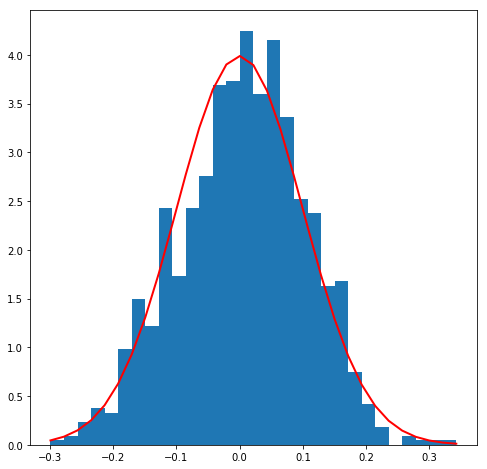

In [42]:
N = 1000
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, N)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8))
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi))*np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')
plt.show()

Percent point function (inverse of cdf — percentiles):

In [43]:
from scipy.stats import norm
x = 1
rv = norm.pdf(x, 0, 1)
vals = norm.ppf([0.001, 0.25, 0.5,0.75, 0.999])
print(vals)
print(rv)

[-3.09023231 -0.67448975  0.          0.67448975  3.09023231]
0.24197072451914337


Cummulative Probability Distribution Function (cdf):

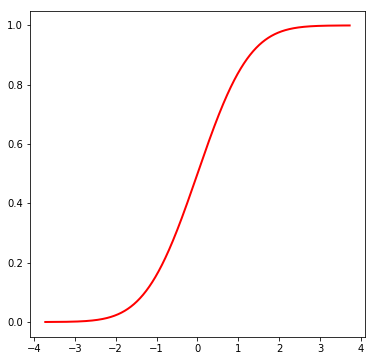

In [44]:
x = np.linspace(norm.ppf(0.0001),norm.ppf(0.9999), 1000)
cd = norm.cdf(x, 0, 1)
fig = plt.figure(figsize=(6,6))
plt.plot(x, cd,linewidth=2, color='r')
plt.show()

Working with scipy-stats:
distribution_name.method(parameters)

Text(0.5, 1.0, 'Histogram of random normal sample')

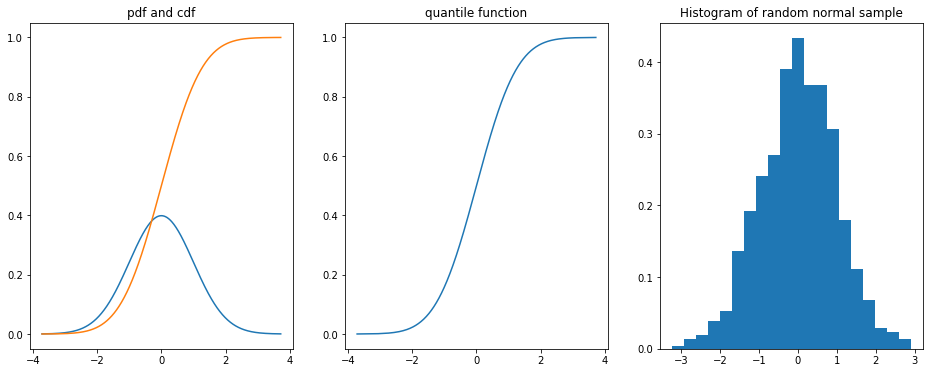

In [45]:
#The location (loc) keyword specifies the mean. The scale (scale) keyword specifies the standard deviation.
x = np.linspace(norm.ppf(0.0001),norm.ppf(0.9999), 1000)
q = np.linspace(0.0001,0.9999,1000)

p = norm.pdf(x, loc=0, scale=1) 
c = norm.cdf(x, loc=0, scale=1)
r = norm.rvs(loc=0, scale=1, size=1000)
xq = norm.ppf(q, loc=0, scale=1)

fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(131)
plt.plot(x,p)
plt.plot(x,c)
ax.set_title("pdf and cdf")
ax1 = fig.add_subplot(132)
plt.plot(xq,q)
ax1.set_title("quantile function")
ax2 = fig.add_subplot(133)
plt.hist(r, 20, density=True)
ax2.set_title("Histogram of random normal sample")


## Selecting number of bins:

Sturge's rule: $n_h = \log _{2}n+1$ 

Freedman Diaconis Estimator: $h = 2 \frac{IQR}{n^{1/3}}$ 

Scott: $h = \sigma \sqrt[3]{\frac{24 * \sqrt{\pi}}{n}}$

Doane: An improved version of Sturges’ formula that produces better estimates for non-normal datasets. This estimator attempts to account for the skew of the data.

\begin{eqnarray*}
n_h = 1 + \log_{2}(n) +
            \log_{2}(1 + \frac{|g_1|}{\sigma_{g_1}})\\
g_1 = mean[(\frac{x - \mu}{\sigma})^3]\\
\sigma_{g_1} = \sqrt{\frac{6(n - 2)}{(n + 1)(n + 3)}}
\end{eqnarray*}

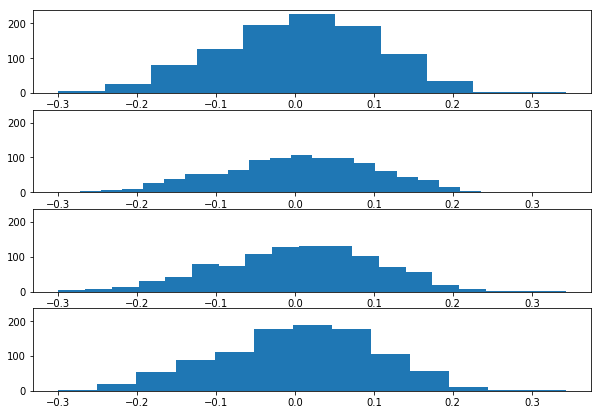

In [46]:
bins_sturges = np.histogram_bin_edges(s, bins='sturges')
bins_fd = np.histogram_bin_edges(s, bins='fd')
bins_scott = np.histogram_bin_edges(s, bins='scott')
bins_doane = np.histogram_bin_edges(s, bins='doane')

fig, axs = plt.subplots(4, 1, figsize=(10, 7),sharey=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(s, bins=bins_sturges)
axs[1].hist(s, bins=bins_fd)
axs[2].hist(s, bins=bins_scott)
axs[3].hist(s, bins=bins_doane)
plt.show()

Univariate Poisson: $f(k; \lambda)=\frac{\lambda^k e^{-\lambda}}{k!}$

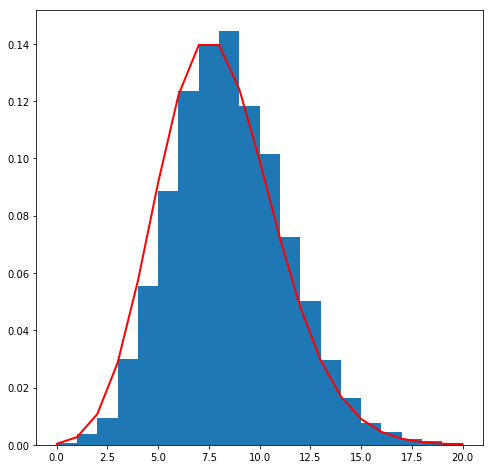

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20.])

In [47]:
from scipy.special import factorial
lamb = 8
k = 10000
s = np.random.poisson(lamb, k)
fig = plt.figure(figsize=(8,8))
count, bins, ignored = plt.hist(s, 20, density=True)
plt.plot(bins, (lamb**bins)*np.exp(-lamb)/factorial(bins),linewidth=2, color='r')
plt.show()
bins

Multivariate distributions:

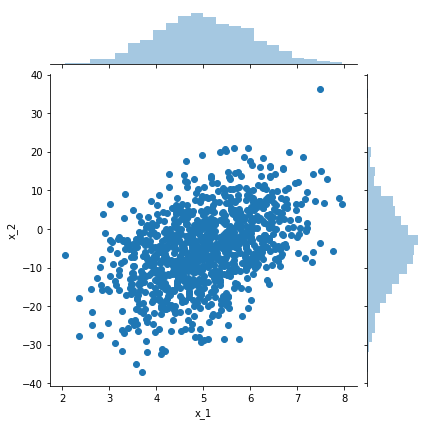

In [48]:
N=1000
mean1 = [5, -5]
cov1 = [[1, 5], [5, 100]]  
# multivariate normal
v = np.random.multivariate_normal(mean1, cov1, N)
dv = pd.DataFrame(v,columns=['x1', 'x2'])
g = sns.jointplot(x="x1", y="x2", data=dv, kind="scatter")
g.set_axis_labels("x_1", "x_2");

Seed initialization for the RNGs:

In [49]:
np.random.seed(11)
rnd1 = np.random.randint(255, size=10)
np.random.seed(20)
rnd2 = np.random.randint(255, size=10)
np.random.seed(11)
rnd3 = np.random.randint(255, size=10)
print(rnd1)
print(rnd2)
print(rnd3)

[153 191  80  91  81 183  13  76 161  71]
[ 99 218  15 223 156 218 137 148  75  22]
[153 191  80  91  81 183  13  76 161  71]


**Simple scatter plots:**

Seaborn

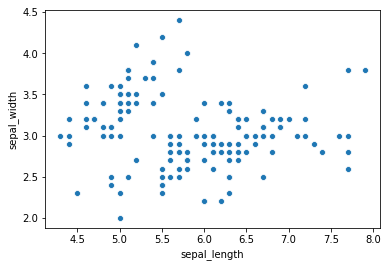

In [50]:
%matplotlib inline
import seaborn as sns
d = sns.load_dataset("iris")
ax = sns.scatterplot(x="sepal_length", y="sepal_width", data=d)

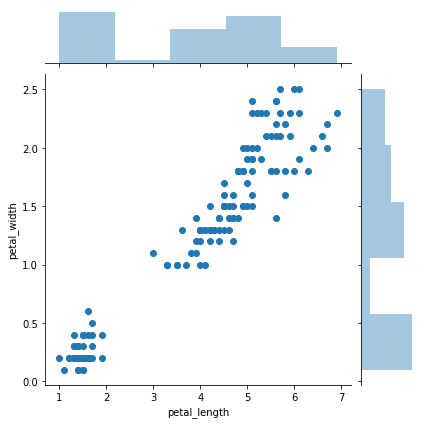

In [51]:
sns.jointplot(x="petal_length", y="petal_width", data=d);

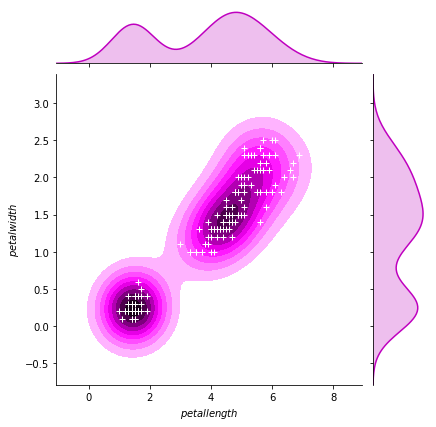

In [52]:
import matplotlib.pyplot as plt

g = sns.jointplot(x="petal_length", y="petal_width", data=d, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$petal length$", "$petal width$");

Grouped scatter plot:

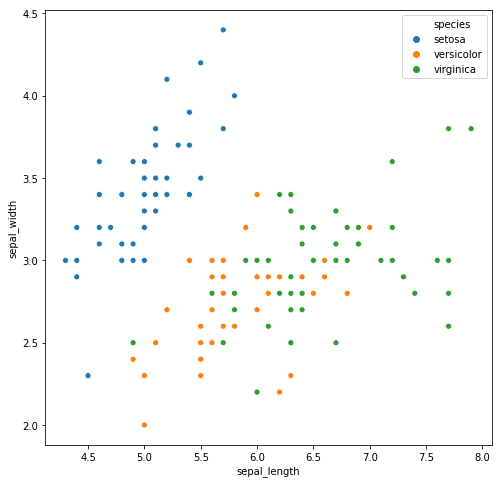

In [53]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(x="sepal_length", y="sepal_width", data=d,hue="species")
plt.show()

Grouped scatter with Pandas: Make sure to convert class labels from a string to a numeric coding:

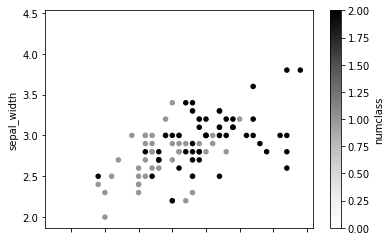

In [54]:
d["numclass"] = pd.Categorical(d["species"], categories=d["species"].unique()).codes
d.plot.scatter(x='sepal_length',y='sepal_width',c='numclass')

Matplotlib: 
Draw $N=1000$ observations from two different 2D normal distributions from two classes:

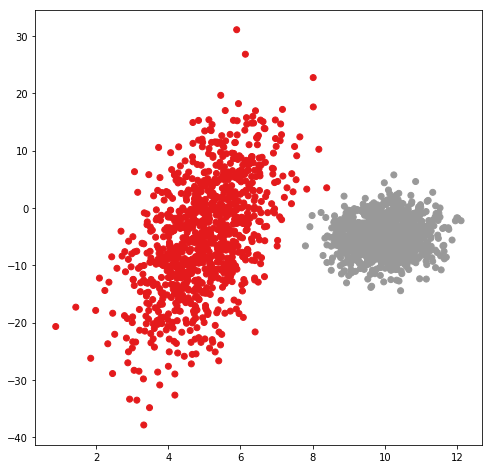

In [55]:
N=1000

mean1 = [5, -5]
cov1 = [[1, 5], [5, 100]]  
# multivariate normal
v1 = np.random.multivariate_normal(mean1, cov1, N)

mean2 = [10, -5]
cov2 = [[0.5, 0.25], [0.25, 10]]  
v2 = np.random.multivariate_normal(mean2, cov2, N)

# concatenate both arrays to get a single array with all observations:
v = np.concatenate((v1,v2),axis=0)

# Assign class labels:
labels1 =  np.zeros(N)
labels2 =  np.ones(N)
labels = np.concatenate((labels1, labels2), axis=0)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8))
plt.scatter(v[:,0],v[:,1],c=labels,cmap='Set1')
plt.show()

**Scatter plot matrix to represent multidimensional numerical data:**

/Users/raulbenitez/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/raulbenitez/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


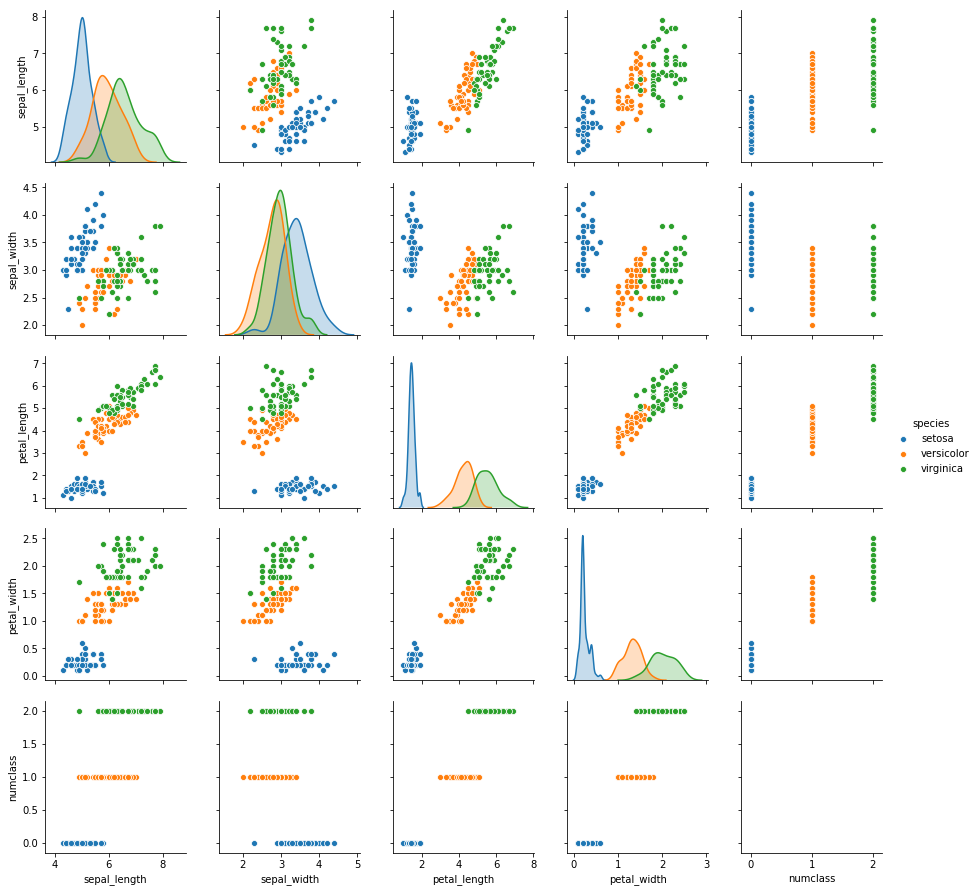

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(d,hue="species")
plt.show()

In [57]:
d.head()

sepal_length  sepal_width  petal_length  petal_width species  numclass
0           5.1          3.5           1.4          0.2  setosa         0
1           4.9          3.0           1.4          0.2  setosa         0
2           4.7          3.2           1.3          0.2  setosa         0
3           4.6          3.1           1.5          0.2  setosa         0
4           5.0          3.6           1.4          0.2  setosa         0

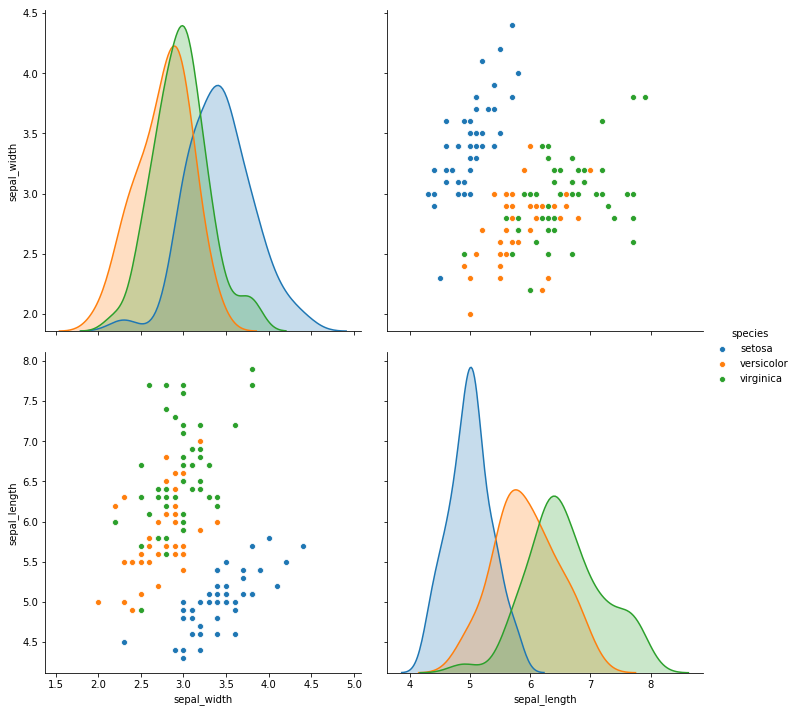

In [58]:
sns.pairplot(d, hue="species",vars=["sepal_width", "sepal_length"],height=5)
plt.show()

Pairplot customization options:

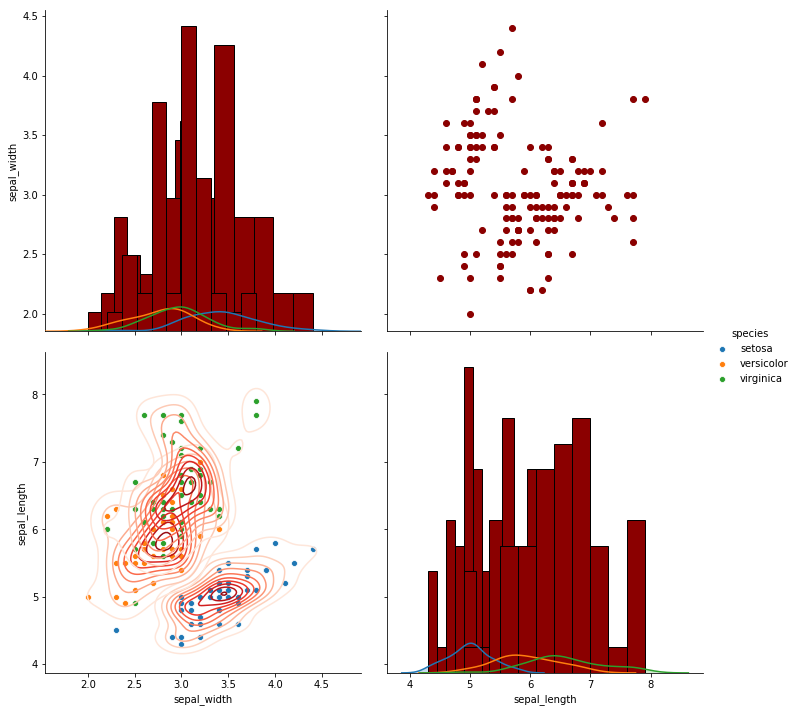

In [59]:
grid = sns.pairplot(d, hue="species",vars=["sepal_width", "sepal_length"],height=5)
grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_diag(plt.hist, bins = 10, color = 'darkred', 
                     edgecolor = 'k')
# Map a density plot to the lower triangle
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')

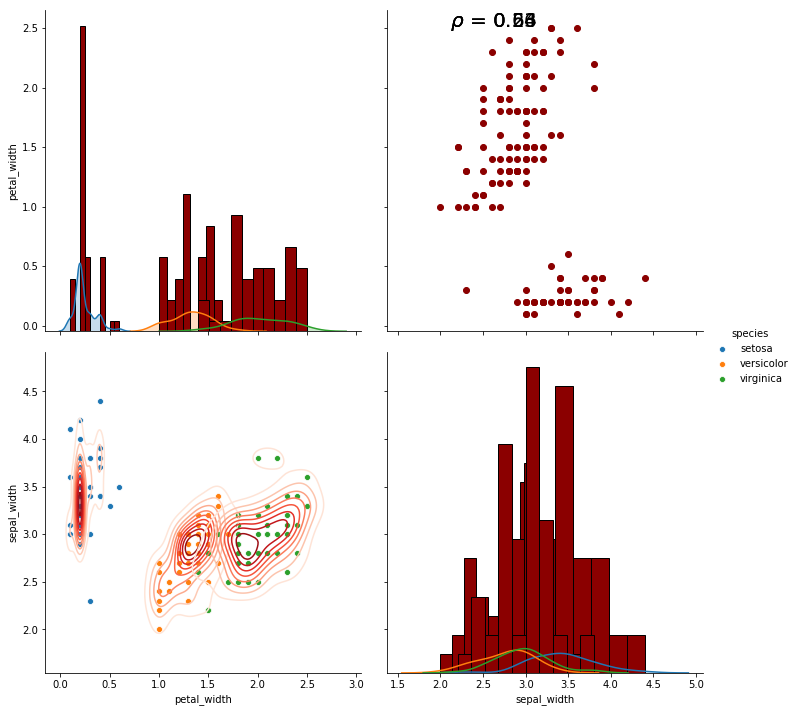

In [60]:
def corrpairs(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)
    
# Create a pair grid instance
grid = sns.pairplot(d, hue="species",vars=["petal_width", "sepal_width"],height=5)

# Map the plots to the locations
grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_upper(corrpairs)
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', color = 'darkred');

**Histograms, box-plots, qquantile-quantile plots, bar plots, etc:**

univariate histogram:

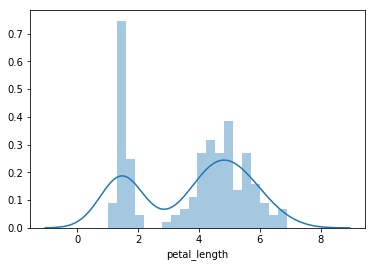

In [61]:
ax4=sns.distplot(d["petal_length"],bins=20)

Normality plots: quantile-quantile plots (qqplot)

<Figure size 432x288 with 0 Axes>

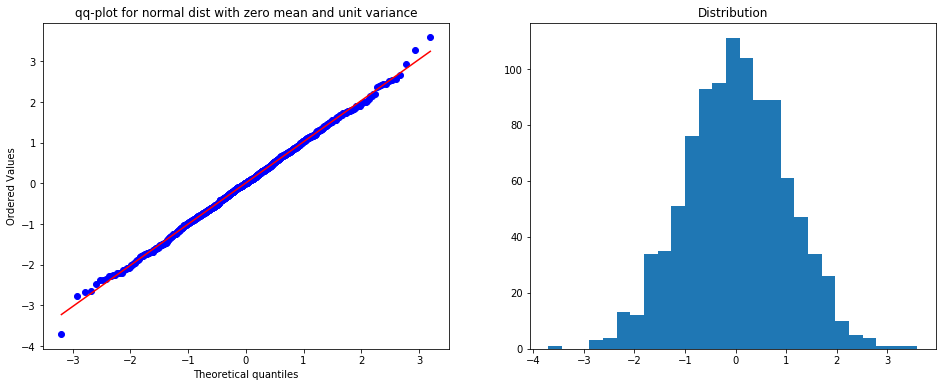

In [62]:
from scipy import stats

fig = plt.figure()
N = 1000
mu, sigma = 0, 1 # mean and standard deviation
fig = plt.figure(figsize=(16,6))
s = np.random.normal(mu, sigma, N)
ax = fig.add_subplot(121)
res = stats.probplot(s, dist=stats.norm, sparams=(0,1), plot=ax)
ax.set_title("qq-plot for normal dist with zero mean and unit variance")
ax1 = fig.add_subplot(122)
plt.hist(s, bins='auto')
ax1.set_title("Distribution")
plt.show()

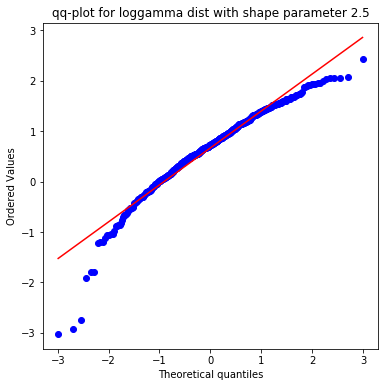

In [63]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
x = stats.loggamma.rvs(c=2.5, size=500)
res = stats.probplot(x, dist=stats.norm, sparams=(0,1), plot=ax)
ax.set_title("qq-plot for loggamma dist with shape parameter 2.5")
plt.show()

Kolmogorov-Smirnov test for normality: null hypothesis the two distributions are identical, F(x)=G(x).

In [64]:
kstest1 = stats.kstest(x, 'norm')
kstest2 = stats.kstest(s, 'norm')
print(kstest1)
print(kstest2)


KstestResult(statistic=0.35873846752821187, pvalue=4.072501449066996e-58)
KstestResult(statistic=0.01716651464283192, pvalue=0.9298128875711273)


Histogram of multiple variables:

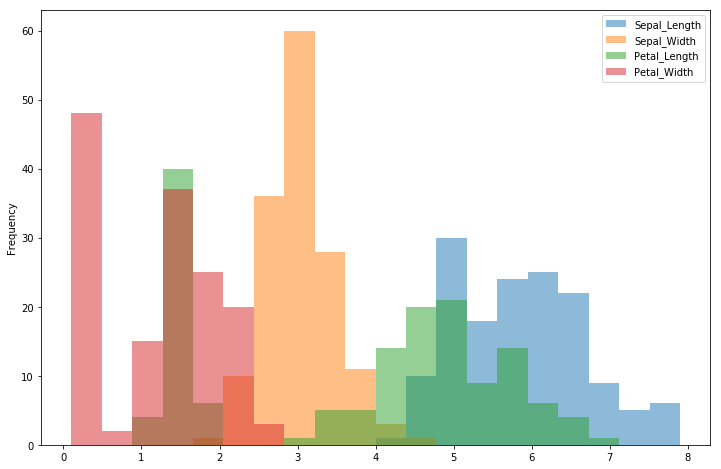

In [65]:
meas =dfmat.iloc[:,:4]
meas.plot.hist(bins=20, alpha=0.5,figsize=(12,8))
plt.show()

Barplots, swarmplots, stripplots:

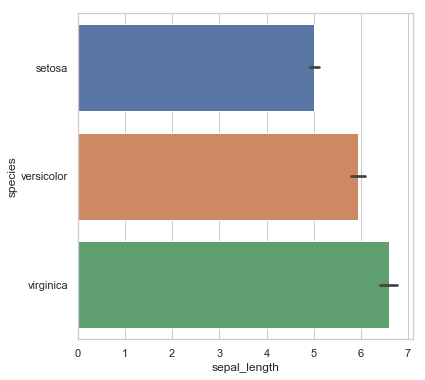

In [66]:
sns.set(style="whitegrid")
fig = plt.figure(figsize=(6,6))
sns.barplot(x="sepal_length", y="species", data=d)
plt.show()

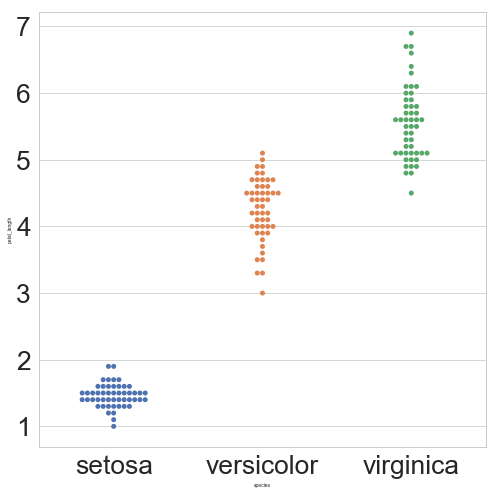

In [67]:
sns.set_context("paper", font_scale=3, rc={"font.size":8,"axes.labelsize":5})
# Construct iris plot
fig = plt.figure(figsize=(8,8))
sns.swarmplot(x="species", y="petal_length", data=d)
plt.show()

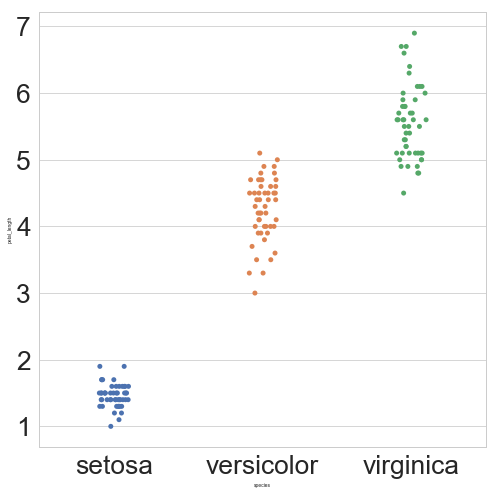

In [68]:
fig = plt.figure(figsize=(8,8))
sns.stripplot(x="species", y="petal_length", data=d)
plt.show()

Figures with multiple subplots:

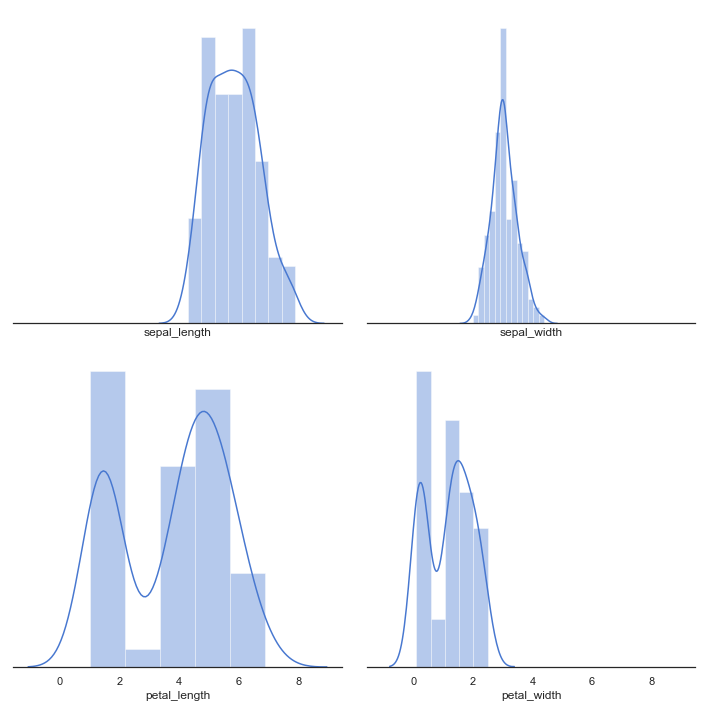

In [69]:
sns.set(style="white", palette="muted", color_codes=True)

f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True)
sns.despine(left=True)

sns.distplot(d["sepal_length"], ax=axes[0, 0])
sns.distplot(d["sepal_width"], ax=axes[0, 1])
sns.distplot(d["petal_length"], ax=axes[1, 0])
sns.distplot(d["petal_width"], ax=axes[1, 1])
               
plt.setp(axes, yticks=[])
plt.tight_layout()

Stacked barplot by groups:

<Figure size 576x576 with 0 Axes>

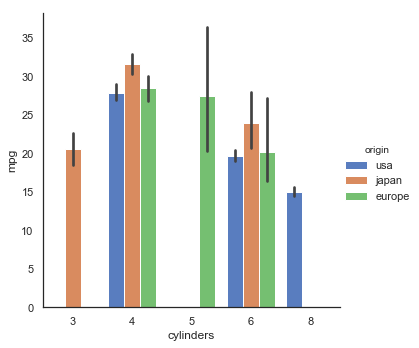

In [70]:
dcars = sns.load_dataset("mpg")
fig = plt.figure(figsize=(8,8))
sns.catplot(x='cylinders', y='mpg', hue='origin', data=dcars, kind='bar')
plt.show()

Boxplots:

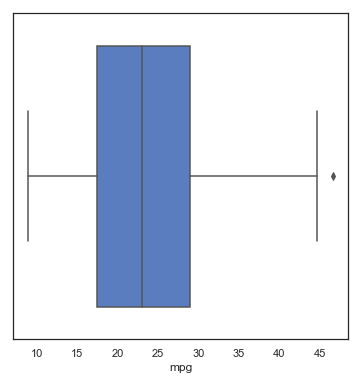

In [71]:
fig = plt.figure(figsize=(6,6))
sns.boxplot(x=dcars["mpg"])
plt.show()

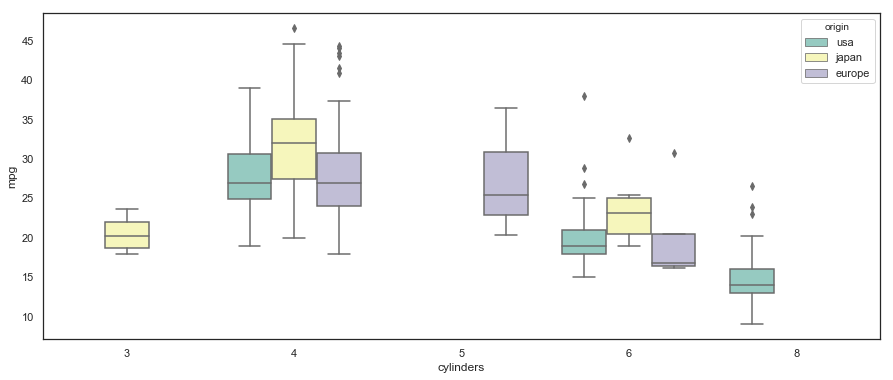

In [72]:
fig = plt.figure(figsize=(15,6))
sns.boxplot(x="cylinders", y="mpg", hue="origin",data=dcars, palette="Set3")
plt.show()

### Multidimensional scaling (MDS):
This technique projects multidimensional data into a lower dimension space by keeping relative distances between observations. The procedure applies an iterative opitmization scheme in order to obtain the optimal projection function. 


- Multidimensional Scaling (MDS) projects high dimensional data to a low-dimensionality space (typically 2D or 3D) {\bf keeping relative distances between observations}.
- Find a transformation satisfying $d_{ij}^k \approx f(d_{ij}^M)$, where 
$d_{ij}^M$ are pariwise distances between observations $(i,j)$ in the original M-dimensional space and $d_{ij}^k$ are distances in the low k-dimensional space ($k \ll M$). 
- MDS finds the transformation $f$ by minimizing the objective function:
\begin{equation*}
S(d_{ij}^k) = \sqrt{\frac{\sum_i \sum_j [f(d_{ij}^M)-d_{ij}^k]^2)]}{\sum_i \sum_j (d_{ij}^k)^2)}}
\end{equation*}

In [73]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.metrics import euclidean_distances

seed = np.random.RandomState(seed=3)

N=1000

mean1 = [-10, -10]
cov1 = [[1, 5], [5, 10]]  
# multivariate normal
v1 = np.random.multivariate_normal(mean1, cov1, N)

mean2 = [10, 10]
cov2 = [[0.5, 0.25], [0.25, 10]]  
v2 = np.random.multivariate_normal(mean2, cov2, N)

# concatenate both arrays to get a single array with all observations:
v = np.concatenate((v1,v2),axis=0)

similarities = euclidean_distances(v)
mds = manifold.MDS(n_components=1, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(similarities).embedding_

/Users/raulbenitez/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  app.launch_new_instance()


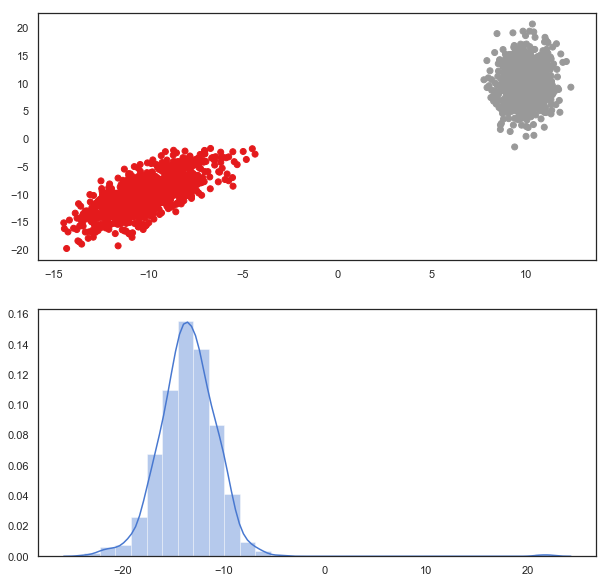

In [74]:
# Assign class labels:
labels1 =  np.zeros(N)
labels2 =  np.ones(N)
labels = np.concatenate((labels1, labels2), axis=0)

fig = plt.figure(figsize=(10,10))
plt.subplot(211)
import matplotlib.pyplot as plt
plt.scatter(v[:,0],v[:,1],c=labels,cmap='Set1')
plt.subplot(212)
import seaborn as sn
sns.distplot(pos[-1000:],bins=30)
plt.show()

**Second MDS example:**

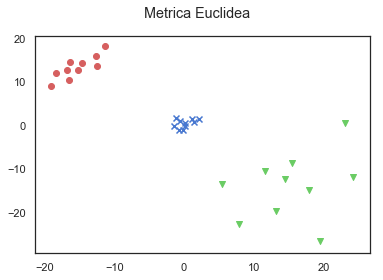

In [75]:
import numpy as np
import pylab as py

from sklearn import manifold
from sklearn.metrics import euclidean_distances

seed = np.random.RandomState(seed=3)

# Matriz de datos (N variables x M observaciones):
N = 4
M = 30

# Generar datos a partir de 3 clusters diferentes:
M3 = int(round(M/3))
X1 = 10 + 2*np.random.randn(M3,N) # cluster 1 (dispersiÛn media)
X2 = -10 + 5*np.random.randn(M3,N) # cluster 2 (dispersiÛn alta)
X3 = 1*np.random.randn(M3,N) # cluster 3 (dispersiÛn baja)

A = np.concatenate((X1,X2,X3))

# TÈcnica MDS: Devuelve la posiciÛn de los datos
# originales en un espacio 2D:
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
similarities = euclidean_distances(A)
pos = mds.fit(similarities).embedding_

# RepresentaciÛn de los datos en el espacio 2D MDS:
fig1 = py.figure()
for i in range(0,M3,1):
    py.scatter(pos[i][0],pos[i][1],marker='o',c='r')
for i in range(M3,2*M3,1):
    py.scatter(pos[i][0],pos[i][1],marker='v',c='g')
for i in range(2*M3,M,1):
    py.scatter(pos[i][0],pos[i][1],marker='x',c='b')
fig1.suptitle('Metrica Euclidea')
py.show()

### 2.2 Grouping data and summary statistics:

Basic summary statistics:

In [76]:
import seaborn as sns
dcars = sns.load_dataset("mpg")
dcars.describe()

mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  126.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year  
count    398.000000  398.000000  
mean      15.568090   76.010050  
std        2.757689    3.697627  
min        8.000000   70.000000  
25%       13.825000   73.000000  
50%       15.500000   76.000000  
75%       17.175000   79.000000  
max       24.800000   82.000000

Grouping data and averaging over groups:

In [77]:
dcars_grouped = dcars.groupby(by=['model_year'])
dcars_grouped.mean()

mpg  cylinders  displacement  horsepower       weight  \
model_year                                                                
70          17.689655   6.758621    281.413793  147.827586  3372.793103   
71          21.250000   5.571429    209.750000  107.037037  2995.428571   
72          18.714286   5.821429    218.375000  120.178571  3237.714286   
73          17.100000   6.375000    256.875000  130.475000  3419.025000   
74          22.703704   5.259259    171.740741   94.230769  2877.925926   
75          20.266667   5.600000    205.533333  101.066667  3176.800000   
76          21.573529   5.647059    197.794118  101.117647  3078.735294   
77          23.375000   5.464286    191.392857  105.071429  2997.357143   
78          24.061111   5.361111    177.805556   99.694444  2861.805556   
79          25.093103   5.827586    206.689655  101.206897  3055.344828   
80          33.696552   4.137931    115.827586   77.481481  2436.655172   
81          30.334483   4.620690    135.310345   81.035714  2522.931034   
82          31.709677   4.193548    128.870968   81.466667  2453.548387   

            acceleration  
model_year                
70             12.948276  
71             15.142857  
72             15.125000  
73             14.312500  
74             16.203704  
75             16.050000  
76             15.941176  
77             15.435714  
78             15.805556  
79             15.813793  
80             16.934483  
81             16.306897  
82             16.638710

### 2.3 Missing data

**Dealing with missing values**

Copy the iris dataframe and replace some values by NaNs:

In [78]:
d = sns.load_dataset("iris")
dnans = d;
mask = dnans.petal_length > 1.45
column_name = 'petal_length'
dnans.loc[mask, column_name] = np.nan
dnans.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           NaN          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [79]:
dnans["petal_length"].isna().head()

0    False
1    False
2    False
3     True
4    False
Name: petal_length, dtype: bool

Remove observations with a missing value in any of its columns:

In [80]:
dnans["petal_length"].dropna().head()

0    1.4
1    1.4
2    1.3
4    1.4
6    1.4
Name: petal_length, dtype: float64

Obtain averages avoiding missing observations:

In [81]:
dnans.loc[dnans['petal_length'].notna()].head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
6           4.6          3.4           1.4          0.3  setosa

In [82]:
dnans.loc[dnans['petal_length'].notna()].mean()

sepal_length    4.895833
sepal_width     3.333333
petal_length    1.325000
petal_width     0.216667
dtype: float64

**Filling missing values:**  
Fill NaNs using the mean of the column

In [83]:
dnans_fillmean = dnans.fillna(dnans.mean())
dnans_fillmean.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5         1.400          0.2  setosa
1           4.9          3.0         1.400          0.2  setosa
2           4.7          3.2         1.300          0.2  setosa
3           4.6          3.1         1.325          0.2  setosa
4           5.0          3.6         1.400          0.2  setosa

Of course you can use other statistical measures of centrality such as the median:

In [84]:
dnans_fillmedian = dnans.fillna(dnans.median())
dnans_fillmedian.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.4          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Replace missing obsevations by linear interpolation from the neighbouring values:

In [85]:
dnans_fillint1 = dnans.interpolate()
dnans_fillint1.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5          1.40          0.2  setosa
1           4.9          3.0          1.40          0.2  setosa
2           4.7          3.2          1.30          0.2  setosa
3           4.6          3.1          1.35          0.2  setosa
4           5.0          3.6          1.40          0.2  setosa

You can use other interpolation methods if you wish:

In [86]:
dnans_fillint2 = dnans.interpolate(method='spline', order=2)
dnans_fillint2.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5      1.400000          0.2  setosa
1           4.9          3.0      1.400000          0.2  setosa
2           4.7          3.2      1.300000          0.2  setosa
3           4.6          3.1      1.369656          0.2  setosa
4           5.0          3.6      1.400000          0.2  setosa

In [87]:
dnans_fillint3 = dnans.interpolate(method='polynomial', order=3)
dnans_fillint3.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5      1.400000          0.2  setosa
1           4.9          3.0      1.400000          0.2  setosa
2           4.7          3.2      1.300000          0.2  setosa
3           4.6          3.1      1.322588          0.2  setosa
4           5.0          3.6      1.400000          0.2  setosa

Filling missing values by back-propagation or forward-propagation of neighbouring values: 
    The maximum consequtive number of missing values 
    replaced can be specified by the option _limit_

Forward filling:

In [88]:
dnans_fillfwd = dnans.fillna(method='pad', limit=1)
dnans_fillfwd.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.3          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Which is equivalent to:

In [89]:
dnans_fillfwd1=dnans.ffill(limit=1)
dnans_fillfwd1.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.3          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Backwards filling:

In [90]:
dnans_fillbkwd = dnans.fillna(method='bfill', limit=1)
dnans_fillbkwd.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.4          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [91]:
dnans_fillbkwd1=dnans.bfill(limit=1)
dnans_fillbkwd1.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.4          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

**Missing data in numpy arrays:**
Use the data imputation methods included in the machine learning libraries sckit-learn

In [92]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
data_to_impute = dnans.iloc[:,:4].values
#data_to_impute = [[7, 2, 3], [4, np.nan, 6], [10, 5, 9]]
imp_mean.fit(data_to_impute)
imputed_data = imp_mean.transform(data_to_impute)
imputed_data[0:5]

array([[5.1  , 3.5  , 1.4  , 0.2  ],
       [4.9  , 3.   , 1.4  , 0.2  ],
       [4.7  , 3.2  , 1.3  , 0.2  ],
       [4.6  , 3.1  , 1.325, 0.2  ],
       [5.   , 3.6  , 1.4  , 0.2  ]])

## 3. PARAMETER ESTIMATION (2h)    

 **Maximum likelihood Estimation (MLE):** 
 
Estimation of a population (true) parameter from a sample of finite size:  
 
\begin{equation*}
data = \mathcal{D} = \{x_1,x_2,\dots,x_n\}
\end{equation*}
 
 Maximization of the Likelihood function: $p(\mathcal{D}|\theta)$ where $\theta$ represrents the parameters of the model describing the distribution of the vales $x_i, i=1,\dots,n$
 
Choose a likelihood function to model the data, the most common an univariate normal distribution with mean $\mu$ and variance $\sigma^2$ and therefore the model parameters are defined as $\theta = (\mu,\sigma^2)$:  

\begin{equation*}
p(x_i|\theta) = p(x_i|\mu,\sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\bigg(-\frac{(x_i-\mu)^2}{2\sigma^2}\bigg)
\end{equation*}

And the likelihood function of the sample of independent and identically distributed (i.i.d.) observations is given by: 

\begin{eqnarray*}
p(\mathcal{D}|\theta) &=& p(x_1,x_2,\dots,x_n|\mu,\sigma^2) \\
&=& \prod_{i=1}^n p(x_i|\theta) \\
&=& \prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^2}} \exp\bigg(-\frac{(x_i-\mu)^2}{2\sigma^2}\bigg) \\
&=& \bigg(\frac{1}{2\pi\sigma^2} \bigg)^\frac{n}{2} \exp\bigg(-\frac{\sum_{i=1}^{n}(x_i-\mu)^2+n(\frac{1}{n}\sum_{i=1}^{n}x_i-\mu)^2}{2\sigma^2}\bigg) 
\end{eqnarray*}

Demo: Let's define the log-likelihood function
\begin{equation*}
\mathcal{L}(\mathcal{D}|,\mu,\sigma) = \log p(\mathcal{D}|\theta) = -\frac{n}{2} \log (2\pi \sigma^2) -\frac{1}{\sigma^2}\sum_{i=1}^{n}(x_i-\mu)^2
\end{equation*}

Which allows explicit derivation of the likelihood function with respect of the model parameters 

\begin{eqnarray*}
\partial_\mu \mathcal{L}(\mathcal{D}|\mu,\sigma)=0 \\
\partial_\sigma \mathcal{L}(\mathcal{D}|\mu,\sigma)=0
\end{eqnarray*}
 
to find the expressions that maximize the likelihood function:

\begin{eqnarray*}
\hat{\mu} &=& \frac{1}{n}\sum_{i=1}^{n}x_i \\
\hat{\sigma}^2 &=& \frac{1}{n}\sum_{i=1}^{n}(x_i-\mu)^2
\end{eqnarray*}
 
The ML estimate for the mean is unbiased, but the ML estimate for the variance $\sigma^2$ is biased because the expected value of the sample variance is not equal to the population variance:

\begin{equation*}
E[\hat{\sigma}^2] = \frac{n-1}{n}\sigma^2 \ne \sigma^2
\end{equation*}

so we usually apply the _unbiased estimator of the variance_ defined as

\begin{equation*}
\hat{\sigma}^2_{unbiased} = \frac{1}{n-1}\sum_{i=1}^{n}(x_i-\mu)^2
\end{equation*}

So the Maximum-Likelihood estimates of the model parameters are given by

\begin{equation*}
\hat{\theta} = (\hat{\mu},\hat{\sigma}^2_{unbiased}) 
\end{equation*}

The assymtptotic expressions for the **standard errors of the ML estimates** are given by:

\begin{eqnarray*}
S.E.(\hat{\mu}) &=& \sqrt{Var[\hat{\mu}]} = \frac{\sigma}{\sqrt{n}} \\
S.E.(\hat{\sigma}^2_{unbiased}) &=& \sqrt{Var[\hat{\sigma}^2_{unbiased}]} = \sigma^2\sqrt{\frac{2}{n-1}}
\end{eqnarray*}


Example: ML estimation from a sample of observations:

In [74]:
# True populational parameters:
mu = 0.13
sig2 = 0.6;

# Random draw of N observations from a N(mu,sig2):
N = 1000
s = np.random.normal(mu, np.sqrt(sig2),N)

# ML sample estimates of mean and variance:
mu_ml = s.mean()
sig2_ml = s.var()



Check bias of the estimators by repeating the procedure for NS samples:

In [75]:
NS = 2000
smany = np.random.normal(mu, np.sqrt(sig2),(N,NS))

dist_mu = smany.mean(axis=0)
bias_mu_ml = dist_mu.mean()-mu

dist_sig2 = smany.var(axis=0)
bias_sig2_ml = dist_sig2.mean()-sig2

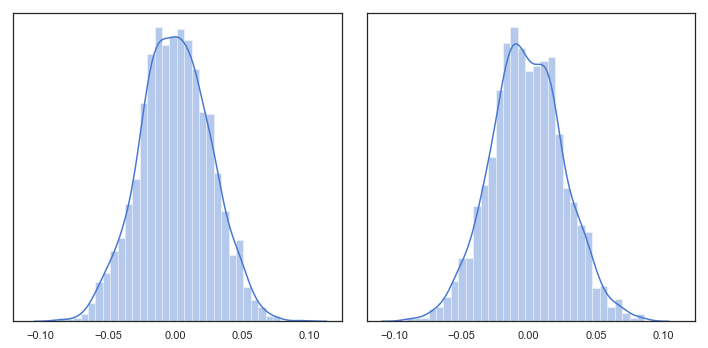

In [76]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True)
sns.distplot(dist_mu-mu, ax=axes[0])
sns.distplot(dist_sig2-sig2, ax=axes[1])
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

**Bayesian inference**

In order to estimate the mean from the observations, we now start from the **Bayes theorem** that establishes that the posterior distribution of the parameter $\theta = \mu$ conditional to the set of observations $\mathcal{D} = \{x_1,x_2,\dots,x_n\}$ is given by 

\begin{equation}
p(\mu|\mathcal{D}) = \frac{p(\mathcal{D}|\mu)p(\mu)}{p(\mathcal{D})}
\label{eq:bayes}
\end{equation}

where

$p(\mu|\mathcal{D})$ is the posterior distribution of the unknown parameter $\mu$

$p(\mathcal{D}|\mu)$ is the likelihood function modeling the distribution of the observations

$p(\mu)$ is the prior distribution of the parameter, obtained from previous knowledge with no observations

$p(\mathcal{D})$ is the marginal distribution $p(\mathcal{D}|\mu)=\int p(\mathcal{D}|\mu)p(\mu) d\mu$ and should be considered as a normalization constant


Basic differences with respect to MLE:

- Bayesian inference allows an iterative update of the estimate as new observations become available. 
- Bayesian inference provides a probability distribution function for the paramenter, while MLE provides a point-estimate of its value and possibly a confidence interval using the distribution of its standard errors. 
- The inference is performed using the posterior distribution, which combines the data model (likelihood function) and the prior knowledge of the possible value of the parameters. 


If we assume that the observations $x_i$ are i.i.d. and normally distributed with a known variance $\sigma^2$ and unknown mean $\mu$ (as we did in the ML case), we have

\begin{equation*}
p(x_i|\mu) = p(x_i|\mu,\sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\bigg(-\frac{(x_i-\mu)^2}{2\sigma^2}\bigg)
\end{equation*}

Since we have a likelihood function

\begin{equation}
p(\mathcal{D}|\theta) = p(\mathcal{D}|\mu) = \prod_{i=1}^n p(x_i|\theta)
\end{equation}

and assuming normal prior distribution with $\mu_0$ and $\sigma_0^2$

\begin{equation}
p(\mu) = \frac{1}{\sqrt{2\pi\sigma_0^2}} \exp\bigg(-\frac{(x_i-\mu)^2}{2\sigma^2}\bigg)
\end{equation}


and substituting in the expression for the posterior Eq. \ref{eq:bayes}

\begin{equation}
p(\mu|\mathcal{D}) = \frac{1}{\sqrt{2\pi\sigma_n^2}} \exp\bigg(-\frac{(x_i-\mu_n)^2}{2\sigma_n^2}\bigg)
\end{equation}

where the parameters of the posterior distribution are given by

\begin{eqnarray*}
\hat{\mu}_n &=& \bigg(\frac{n\sigma_0^2}{n\sigma_0^2+\sigma^2}\bigg)\hat{\mu}_n + \frac{\sigma^2}{n\sigma_0^2+\sigma^2} \\
\hat{\sigma_n}^2 &=& \frac{\sigma_0^2\sigma^2}{n\sigma_0^2+\sigma^2}
\end{eqnarray*}
 

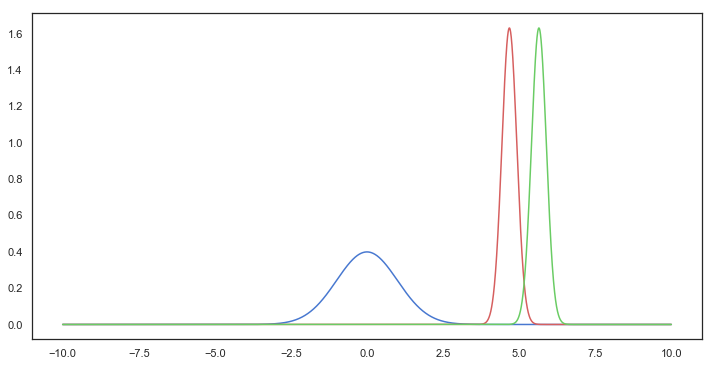

In [77]:
# Bayesian estimation 

# True populational parameters:
mu = 5.6
sig2 = 3.6;

# prior distribution: 
mu_0 = 0
sig2_0 = 1

# Posterior distribution after n=10 samples are considered: 
n = 10
x = np.random.normal(mu, np.sqrt(sig2),n)

mu_post_10 = (n*sig2_0/(n*sig2_0+sig2))*x.mean()+sig2*mu_0/(n*sig2_0+sig2)
sig2_post_10 = np.sqrt(sig2_0*sig2/(N*sig2_0+sig2))

# Posterior distribution after n=1000 samples are considered: 
n = 1000
x = np.random.normal(mu, np.sqrt(sig2),n)
mu_post_1000 = (n*sig2_0/(n*sig2_0+sig2))*x.mean()+sig2*mu_0/(n*sig2_0+sig2)
sig2_post_1000 = np.sqrt(sig2_0*sig2/(N*sig2_0+sig2))

# Visualize results:
from scipy.stats import norm
# 1-d grid to evaluate the parameter mu:
theta = np.linspace(-10,10, num=5000)

prior_dist10 = norm.pdf(theta,loc=mu_0, scale=np.sqrt(sig2_0))
post_dist10 = norm.pdf(theta,loc=mu_post_10, scale=np.sqrt(sig2_post_10))
post_dist1000 = norm.pdf(theta,loc=mu_post_1000, scale=np.sqrt(sig2_post_1000))

fig = plt.figure(figsize=(12,6))
ax11=plt.plot(theta, prior_dist10,'b-')
ax11=plt.plot(theta, post_dist10,'r-')
ax11=plt.plot(theta, post_dist1000,'g-')


In [78]:
print('mu =', mu)
print('mu_0 =', mu_0)
print('mu_10 =', mu_post_10)
print('mu_1000 =', mu_post_1000)

print('standard errors of the means:')
print('SE(mu_10) =', np.sqrt(sig2_post_10/10))
print('SE(mu_1000) =', np.sqrt(sig2_post_1000/1000))

mu = 5.6
mu_0 = 0
mu_10 = 4.677619887387956
mu_1000 = 5.648328076883266
standard errors of the means:
SE(mu_10) = 0.07739010965746639
SE(mu_1000) = 0.007739010965746638


**Bayesian update formulas:**
    
Once we have a bayesian inference using n samples

\begin{equation}
p(\mu|\mathcal{D}) = \frac{p(\mathcal{D}|\mu)p(\mu)}{p(\mathcal{D})}
\end{equation}

we can update the posterior density by incorporating a new observation $x_{new}$. Indeed, since the new observation is independent from the previous n observations and follows the same gaussian distribution, the updated likelihood function can be factorized as

\begin{equation}
p(\mathcal{D},x_{new}|\mu) = p(x_{new}|\mu)p(\mathcal{D}|\mu)
\end{equation}

and the updated posterior can be then written as the product of the new likelihood and the previous posterior:

\begin{equation}
p(\mu|\mathcal{D},x_{new}) = \frac{p(x_{new}|\mu)p(\mathcal{D}|\mu)p(\mu)}{p(\mathcal{D})} 
= p(x_{new}|\mu)p(\mu|\mathcal{D})
\end{equation}


**Bootstrapping and resampling methods:**  

The bootstrap method is very convenient approach when data can not be easily modeled to follow 
any particular theoretical distribution or when the computations are rather involved or provide no closed analytical formulas. 

Bootstrapping involves iteratively resampling a dataset with replacement.
You should choose the size of the sample and the number of repeats.
The scikit-learn provides a function that you can use to resample a dataset for the bootstrap method.





In [79]:
# True populational parameters:
mu = 21.21
sig2 = 12.12;

# Random draw of N observations from a N(mu,sig2):
nsamples = 1e4
x = np.random.normal(mu, np.sqrt(sig2),n)

# sample length
n = len(x)
# number of repeats
reps = 10000
# random sample with replacement
xb = np.random.choice(x, (n, reps))
mb = xb.mean(axis=0)
mb.sort()
# estimation for the mean
xb.mean(axis=0).mean()
# 95% confidence interval for the estimation of the mean
np.percentile(mb, [2.5, 97.5])


array([20.99179575, 21.43568427])

Robust estimation of the sample variance using the Maximum Absolute Deviation (MAD):


$\hat{\sigma} = k*\text{MAD}(x)$, where $\text{MAD}(x) = \text{median}(|x-\text{median(x)}|$ and k = 1.4826

When comparing the behavior of median_absolute_deviation with np.std, the latter is affected when we change a single value of an array to have an outlier value while the MAD hardly changes:

In [162]:
from scipy import stats
N = 1000
mu, sigma = 0, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, N)

std1 = s.std()
std2 = 1.4826*np.median(abs(np.median(s)-s))
print('std before outlier:', std1)
print('std(MAD) before outlier:', std2)

s[0] = 1000

std1 = s.std()
std2 = 1.4826*np.median(abs(np.median(s)-s))

print('std 1 after outlier:', std1)
print('std(MAD) after outlier:', std2)


std before outlier: 0.9799668669371094
std(MAD) before outlier: 1.0281315715805326
std 1 after outlier: 31.6219105947736
std(MAD) after outlier: 1.0245920516336844


## 4. HYPOTHESIS TESTING (2h)  

Comparing means: Parametric and non-parametric tests:

Independent (unpaired samples): 


Null hypotesis $H_0: \mu = \mu_0$ 

Alternate hypotesis $H_1: \mu \ne \mu_0$ 

In testing the null hypothesis that the population mean is equal to a specified value $\mu_0$, one uses the statistic

${\displaystyle t={\frac {{\bar {x}}-\mu _{0}}{s/{\sqrt {n}}}}}$

The one-sample t-test is a parametric test of the location parameter when the population standard deviation is unknown.

In [163]:
from scipy.stats import t
N = 100
df = N-1
x = np.linspace(t.ppf(0.0001,df),t.ppf(0.9999,df), N)
q = np.linspace(0.0001,0.9999,N)

pt = t.pdf(x,df,loc=0,scale=1)
xqt = t.ppf(q,df,loc=0,scale=1)

Confidence intervals: 

$\text{CI}_{100(1-\alpha)\%} = [\mu - t(\frac{\alpha}{2},\nu)\frac{s}{\sqrt{n}},\mu + t(1-\frac{\alpha}{2},\nu)\frac{s}{\sqrt{n}}]$

At the $95\%$ confidence level (\$\alpha=0.05$) we have: 

$\text{CI}_{95\%} = [\mu - t(0.025,\nu)\frac{s}{\sqrt{n}},\mu + t(0.975,\nu)\frac{s}{\sqrt{n}}]$

In [164]:
# Draw a random sample
mu0 = 13
r = norm.rvs(mu0,1,1000)
s = np.std(r,ddof=1)
se = s/np.sqrt(N)

t.ppf(0.005,df)
t.ppf(0.975,df)

CI_left = np.mean(r) - t.ppf(0.005,df)*se 
CI_right = np.mean(r) + t.ppf(0.975,df)*se 
(CI_left,CI_right)

(13.254529567373554, 13.19205743583401)

In [165]:

s = np.std(r,ddof=1)
se = s/np.sqrt(r.size)
tstar = (np.mean(r)-mu0)/se
print(tstar)

df = r.size-1
pv = 2*(1-t.cdf(np.abs(tstar),df))
print(pv)

stats.ttest_1samp(r,mu0)

-0.03144376314880536
0.9749219211609921


Ttest_1sampResult(statistic=-0.03144376314880536, pvalue=0.9749219211609921)

In [166]:
t.pdf(tstar,df)

0.3986451392481864

# Decision errors, p-values and statistical significance:

Type I error: Rejection of $H_0$ when is true
Type II error: Acceptance of $H_0$ when its false

$\alpha$ : significance level: Maximum tolerable probability of type I errors. Choosing a 95% confidence level corresponds to a maximum probability $p=0.05$ of rejecting a correct $H_0$. The p-value is the probability of Type I errors. If the p-value exceeds the maximum allowed probability then $H_0$ can not be rejected. It is equivalent to checking if $\mu_0$ lies inside the $\alpha$ confidence interval.

$\beta$: Power of the test: 

In [167]:
r = np.array([0.5,1.5,0.1,0.4,0.8,1.1,1.8])
mu0=1.3
print(r)
stats.ttest_1samp(r,mu0)

[0.5 1.5 0.1 0.4 0.8 1.1 1.8]


Ttest_1sampResult(statistic=-1.7825773093977855, pvalue=0.12493013238905315)

In [168]:
s = np.std(r,ddof=1)
se = s/np.sqrt(r.size)
tstar = (np.mean(r)-mu0)/se
CI_left = np.mean(r) - t.ppf(0.005,df)*se 
CI_right = np.mean(r) + t.ppf(0.975,df)*se 
print((CI_left,CI_right),tstar)

(1.4855041765024517, 1.3417786760844246) -1.7825773093977852


Compare means of two samples:

In [100]:
# t-test comparison of means of two samples:
from scipy import stats

# sample 1:
mu_1 = 1
sig2_1 = 0.0002;
nsamples = 10
x1 = np.random.normal(mu_1, np.sqrt(sig2_1),nsamples)
#x1 = np.array([0.2,-0.1,0.7,-0.8,0.3,0.26,-0.4])

# sample 2:
mu_2 = 1.1
sig2_2 = 0.0001;
nsamples = 10
x2 = np.random.normal(mu_2, np.sqrt(sig2_2),nsamples)
#x2 = np.array([-0.8,-0.1,0.2,-0.3,0.4,-0.6,0.05])

ttest1 = stats.ttest_ind(x1,x2)

print('p-value= ',ttest1.pvalue)


p-value=  1.1186353787788225e-11


In [170]:
s1 = np.std(x1,ddof=1)
s2 = np.std(x2,ddof=1)
se12 = np.sqrt(s1**2/x1.size + s2**2/x2.size)
tstar = (np.mean(x1)-np.mean(x2))/se12
print(tstar)



df = x1.size+x2.size-1
pv = 2*(1-t.cdf(np.abs(tstar),df))
print(pv)

0.7510771551151059
0.46598559631236514


In [171]:
ttest1 = stats.ttest_ind(x1,x2)

In [172]:
ttest2 = stats.ranksums(x1,x2)
print(ttest2)

RanksumsResult(statistic=0.7666518779999278, pvalue=0.4432885221164401)


Comparing variances:


Both Barlett and Levene test tests the null hypothesis that all input samples are from populations with equal variances. Levene’s test is an alternative to Bartlett’s test bartlett in the case where there are significant deviations from normality. Options for the Levene's test:

‘median’ : Recommended for skewed (non-normal) distributions>
‘mean’ : Recommended for symmetric, moderate-tailed distributions.
‘trimmed’ : Recommended for heavy-tailed distributions.

Comparing variance of two samples:

In [105]:
# sample 1:
mu_1 = 1
sig2_1 = 1;
nsamples = 100
x3 = np.random.normal(mu_1, np.sqrt(sig2_1),nsamples)

# sample 2:
mu_2 = 1
sig2_2 = 0.95;
nsamples = 100
x4 = np.random.normal(mu_2, np.sqrt(sig2_2),nsamples)

test3 = stats.bartlett(x3,x4)
test4 = stats.levene(x3,x4)
print('Barlett: ', test3)
print('Levene: ', test4)

Barlett:  BartlettResult(statistic=0.03348369849219143, pvalue=0.8548093845244813)
Levene:  LeveneResult(statistic=0.007758139324506419, pvalue=0.9299018735567539)


# Regression models


## Linear Regression (univariate)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     832.4
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           1.08e-49
Time:                        08:22:22   Log-Likelihood:                 318.67
No. Observations:                 100   AIC:                            -633.3
Df Residuals:                      98   BIC:                            -628.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0009      0.002    499.391      0.0

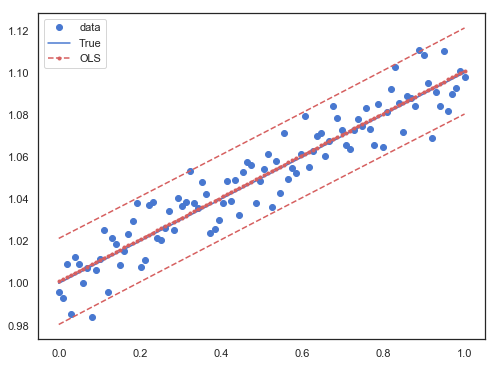

In [119]:
import statsmodels.api as sm
nsample = 100
x = np.linspace(0, 1, nsample)
beta = np.array([1, 5])
e = np.random.normal(size=nsample)

X = sm.add_constant(x) # adds a first column to add an intercept (beta_0) to our model
sig = 0.5
y_true = np.dot(X, beta)
y = y_true + sig*e

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

from statsmodels.sandbox.regression.predstd import wls_prediction_std
prstd, iv_l, iv_u = wls_prediction_std(results)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, results.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best');

Using the graphical tools of the statsmodels libraries:

Text(0.5, 1.0, 'Linear Regression')

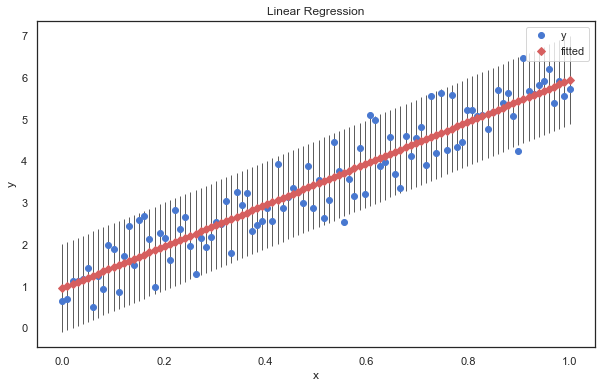

In [175]:
fig, ax = plt.subplots(figsize=(10,6))
fig = sm.graphics.plot_fit(results, "x1", ax=ax)
ax.set_ylabel("y")
ax.set_xlabel("x")
ax.set_title("Linear Regression")

Check variable names and model properties:

In [120]:
print('Endogenous variables (dependent): ' + model.endog_names)
print('Exogenous variables (independent, regressors): {} {}'.format(*model.exog_names))

Endogenous variables (dependent): y
Exogenous variables (independent, regressors): const x1


## Model Selection using AIC index:

Model 1 AIC:  164.4937499645188
Model 2 AIC:  166.45091698364274
Model 3 AIC:  167.49831010299835


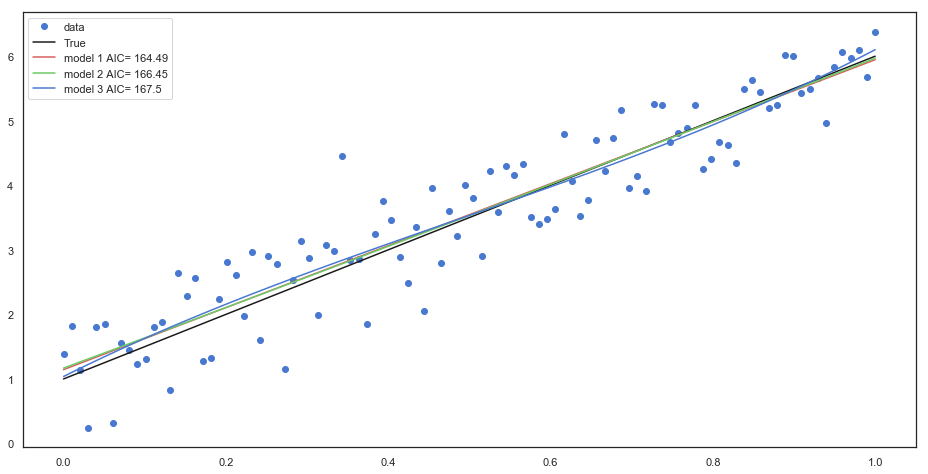

In [177]:
nsample = 100
x = np.linspace(0, 1, nsample)
beta = np.array([1, 5])
e = np.random.normal(size=nsample)

X = sm.add_constant(x) # adds a first column with ones
sig = 0.5
y_true = np.dot(X, beta)
y = y_true + sig*e

model1 = sm.OLS(y, X)
results1 = model1.fit()

X2 = np.column_stack((x, x**2))
X2 = sm.add_constant(X2) # adds a first column with ones
model2 = sm.OLS(y, X2)
results2 = model2.fit()

X3 = np.column_stack((x, x**2, x**3))
X3 = sm.add_constant(X3) # adds a first column with ones
model3 = sm.OLS(y, X3)
results3 = model3.fit()

print('Model 1 AIC: ',results1.aic)
print('Model 2 AIC: ',results2.aic)
print('Model 3 AIC: ',results3.aic)


fig, ax = plt.subplots(figsize=(16,8))
ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'k-', label="True")
ax.plot(x, results1.fittedvalues, 'r-', label="model 1 AIC= {:.5}".format(results1.aic))
ax.plot(x, results2.fittedvalues, 'g-', label="model 2 AIC= {:.5}".format(results2.aic))
ax.plot(x, results3.fittedvalues, 'b-', label="model 3 AIC= {:.5}".format(results3.aic))
ax.legend()
plt.show()

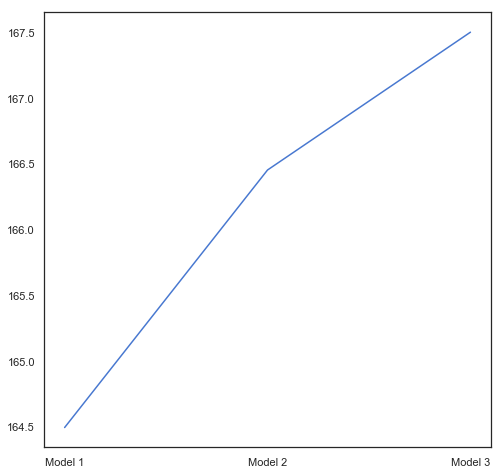

In [178]:
aics = np.array([results1.aic,results2.aic,results3.aic])

fig, ax = plt.subplots(figsize=(8,8))
ind = np.arange(aics.size)
plt.plot(ind, aics)
plt.xticks(ind, ('Model 1', 'Model 2', 'Model 3'))
plt.show()


## Model checking: Model inspection plots 

One should check the properties of the residuals:

residuals = observations - fitted values

In particular, one should plot the residuals against:

- residuals vs fitted (predicted) values: Check for non-constancy of variance (heteroscedasticity) and for nonlinear patterns in the data (nonliniearity)
- residuals vs normal deviates (q-q plot): Check for non-normality 
- residuals vs explanatory variables: Check for curvature
- residuals vs sequence of data: Check for temporal correlations


First thing to do is checking that the residuals have a zero mean:

In [179]:
results.resid.mean()

3.1974423109204507e-16

Residuals vs fitted values : Become suspicious when the residuals grow as a function of predicted value (Heteroscedasticity). Observing a ‘bowed’ pattern indicates that the model makes systematic errors whenever it is making unusually large or small predictions therefore indicating presence of nonlinear patterns in the data (nonlinearity). 

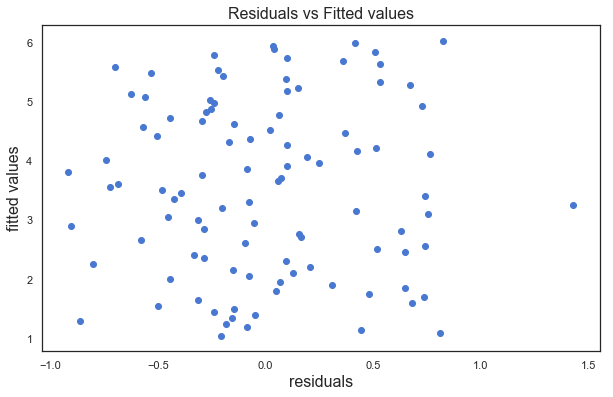

In [121]:
nsample = 100
x = np.linspace(0, 1, nsample)
beta = np.array([1, 5])
e = np.random.normal(size=nsample)

X = sm.add_constant(x) # adds a first column with ones
sig = 0.5
y_true = np.dot(X, beta)
y = y_true + sig*e

model = sm.OLS(y, X)
results = model.fit()

fig = plt.figure(figsize=(10,6))
plt.scatter(results.resid,results.fittedvalues)
plt.title('Residuals vs Fitted values',fontsize=16)
plt.ylabel('fitted values',fontsize=16)
plt.xlabel('residuals',fontsize=16)
plt.show()


Residuals vs explanatory variables

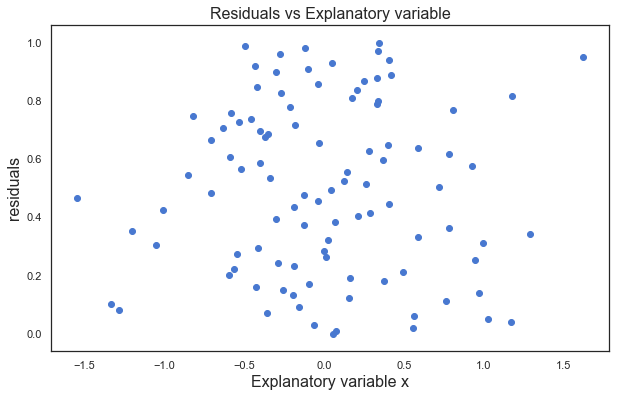

In [181]:
fig = plt.figure(figsize=(10,6))
plt.scatter(results.resid,model.exog[:,1])
plt.title('Residuals vs Explanatory variable',fontsize=16)
plt.xlabel('Explanatory variable x',fontsize=16)
plt.ylabel('residuals',fontsize=16)
plt.show()

**Testing heteroscedasticity**: The Breusch-Pagan Lagrange Multiplier test for heteroscedasticity.

Tests the hypothesis that the residual variance does not depend on the variables in x.


https://en.wikipedia.org/wiki/Breusch%E2%80%93Pagan_test
        

In [182]:
lm,lmp,f,fp = sm.stats.diagnostic.het_breuschpagan(results.resid,model.exog)
print('Lagrange multiplier p-value = {}'.format(lmp))
print('F-score p-value = {}'.format(fp))

Lagrange multiplier p-value = 0.20883650501414952
F-score p-value = 0.21279483934614737


Residuals vs normal deviates (q-q plot): Residuals shoud be normally distributed

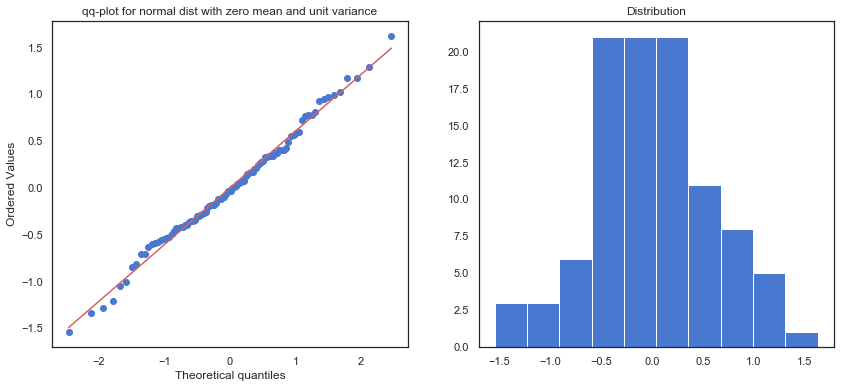

In [183]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(121)
res = stats.probplot(results.resid, dist=stats.norm, sparams=(0,1), plot=ax)
ax.set_title("qq-plot for normal dist with zero mean and unit variance")
ax1 = fig.add_subplot(122)
plt.hist(results.resid, bins='auto')
ax1.set_title("Distribution")
plt.show()

Model inspection plots included in the statsmodels library:

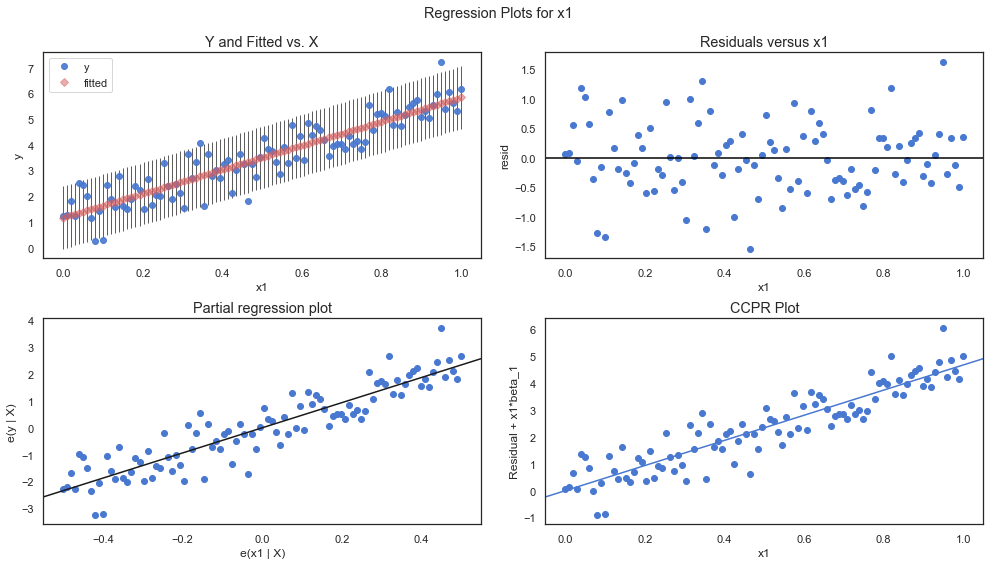

In [184]:
fig = plt.figure(figsize=(14,8))
fig = sm.graphics.plot_regress_exog(results, "x1", fig=fig)

Let's see what happens when data is nonlinear and we fit a linear model:

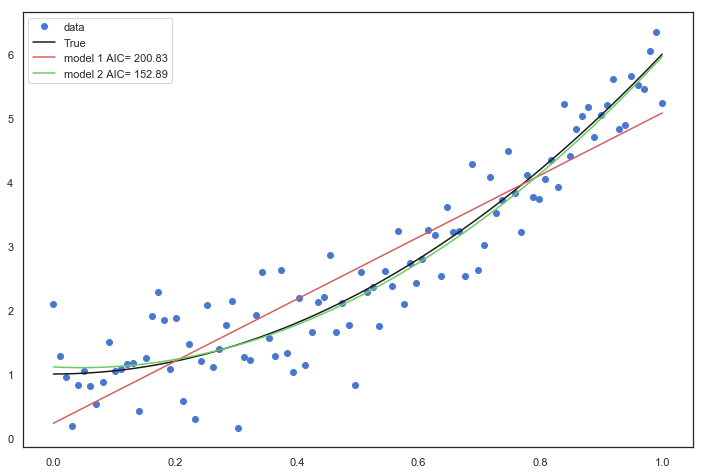

In [185]:
nsample = 100
x = np.linspace(0, 1, nsample)
beta = np.array([1, 5])
sig = 0.5
e = np.random.normal(size=nsample)


X = sm.add_constant(x) # adds a first column with ones
y_true = np.dot(X**2, beta)
y = y_true + sig*e

model1 = sm.OLS(y, X)
results1 = model1.fit()

X2 = np.column_stack((x, x**2))
X2 = sm.add_constant(X2) # adds a first column with ones
model2 = sm.OLS(y, X2)
results2 = model2.fit()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'k-', label="True")
ax.plot(x, results1.fittedvalues, 'r-', label="model 1 AIC= {:.5}".format(results1.aic))
ax.plot(x, results2.fittedvalues, 'g-', label="model 2 AIC= {:.5}".format(results2.aic))
ax.legend()
plt.show()

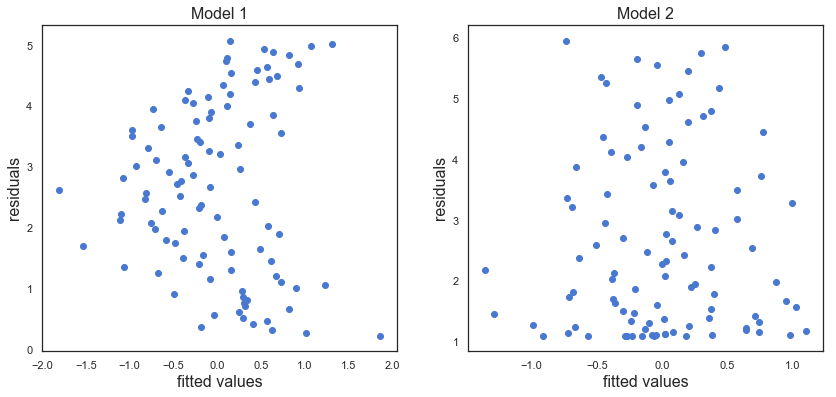

In [186]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(121)
plt.scatter(results1.resid,results1.fittedvalues)
plt.title('Model 1',fontsize=16)
plt.xlabel('fitted values',fontsize=16)
plt.ylabel('residuals',fontsize=16)

ax1 = fig.add_subplot(122)
plt.scatter(results2.resid,results2.fittedvalues)
plt.title('Model 2',fontsize=16)
plt.xlabel('fitted values',fontsize=16)
plt.ylabel('residuals',fontsize=16)
plt.show()

Let's see what happens when errors are not normally distributed:

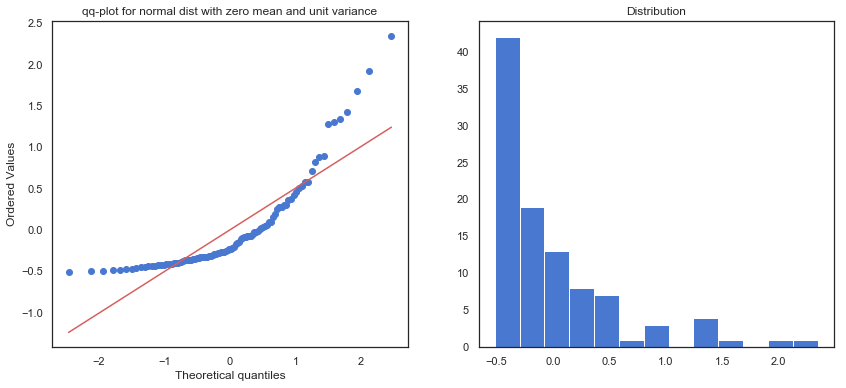

In [187]:
nsample = 100
x = np.linspace(0, 1, nsample)
beta = np.array([1, 5])
sig = 0.5
e = np.random.exponential(size=nsample)


X = sm.add_constant(x) # adds a first column with ones
y_true = np.dot(X, beta)
y = y_true + sig*e

model = sm.OLS(y, X)
results = model.fit()
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(121)
res = stats.probplot(results.resid, dist=stats.norm, sparams=(0,1), plot=ax)
ax.set_title("qq-plot for normal dist with zero mean and unit variance")
ax1 = fig.add_subplot(122)
plt.hist(results.resid, bins='auto')
ax1.set_title("Distribution")
plt.show()

Let's see what happens when variance depends on explanatory variable:

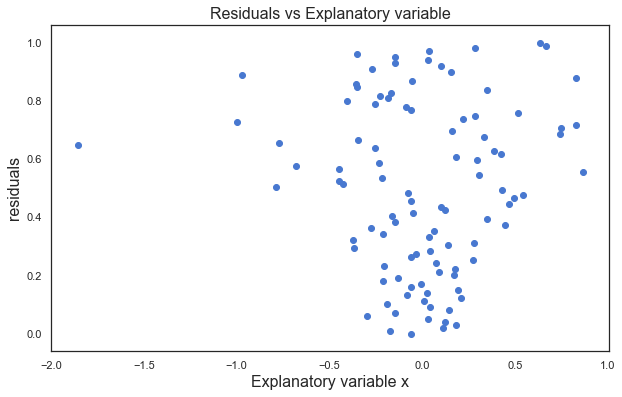

In [188]:
nsample = 100
x = np.linspace(0, 1, nsample)
beta = np.array([1, 5])
sig = np.linspace(0.1, 0.8, nsample)
e = np.random.normal(size=nsample)

X = sm.add_constant(x) # adds a first column with ones
y_true = np.dot(X, beta)
y = y_true + sig*e

model = sm.OLS(y, X)
results = model.fit()
fig = plt.figure(figsize=(10,6))

plt.scatter(results.resid,model.exog[:,1])
plt.title('Residuals vs Explanatory variable',fontsize=16)
plt.xlabel('Explanatory variable x',fontsize=16)
plt.ylabel('residuals',fontsize=16)
plt.show()

Working with dataframes and using 'R-like' formulas for the model specification:

In [189]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd

#x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
#y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])

nsample = 100
x = np.linspace(0, 1, nsample)
beta = np.array([1, 5])
e = np.random.normal(size=nsample)

X = sm.add_constant(x) # adds a first column with ones
sig = 0.5
y_true = np.dot(X, beta)
y = y_true + sig*e

df = pd.DataFrame(columns=['y', 'x'])
df['x'] = x
df['y'] = y

degree = 3
weights = np.polyfit(x, y, degree)
model = np.poly1d(weights)
results = smf.ols(formula='y ~ model(x)', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     811.3
Date:                Wed, 10 Jul 2019   Prob (F-statistic):           3.34e-49
Time:                        09:19:59   Log-Likelihood:                -70.820
No. Observations:                 100   AIC:                             145.6
Df Residuals:                      98   BIC:                             150.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.971e-15      0.132   1.49e-14      1.000      -0.263       0.263
model(x)       1.0000      0.035     28.482      0.000       0.930       1.070
==============================================================================
Omnibus:                        7.827   Durbin-Watson:                   2.322
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.695
Skew:                           0.539   Prob(JB):                       0.0213
Kurtosis:                       3.827   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

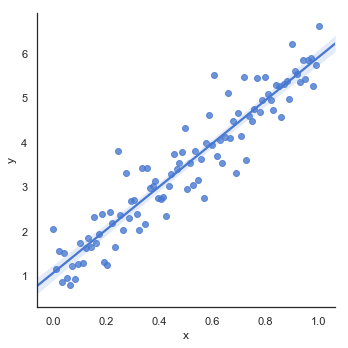

In [190]:
sns.lmplot(x="x", y="y", data=df);
plt.show()


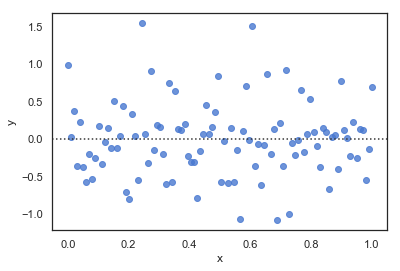

In [191]:
sns.residplot(x="x", y="y", data=df);

Multivariate linear regression using statsmodels and pandas:

We will use the well-known boston dataset included in the sklearn built-in datasets: Detailed information can be found https://scikit-learn.org/stable/datasets/index.html#boston-dataset
	
The dataset includes 13 numeric/categorical predictive variables:

CRIM per capita crime rate by town

ZN proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS proportion of non-retail business acres per town

CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX nitric oxides concentration (parts per 10 million)

RM average number of rooms per dwelling

AGE proportion of owner-occupied units built prior to 1940

DIS weighted distances to five Boston employment centres

RAD index of accessibility to radial highways

TAX full-value property-tax rate per $10,000

PTRATIO pupil-teacher ratio by town

B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT $\%$ lower status of the population


and one response variable: 

MEDV Median value of owner-occupied homes in $1000’s

In [123]:
from pandas import DataFrame

from sklearn.datasets import load_boston
boston = load_boston()

# define the data/predictors as the pre-set feature names  
df = pd.DataFrame(boston.data, columns=boston.feature_names)
list(df)

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

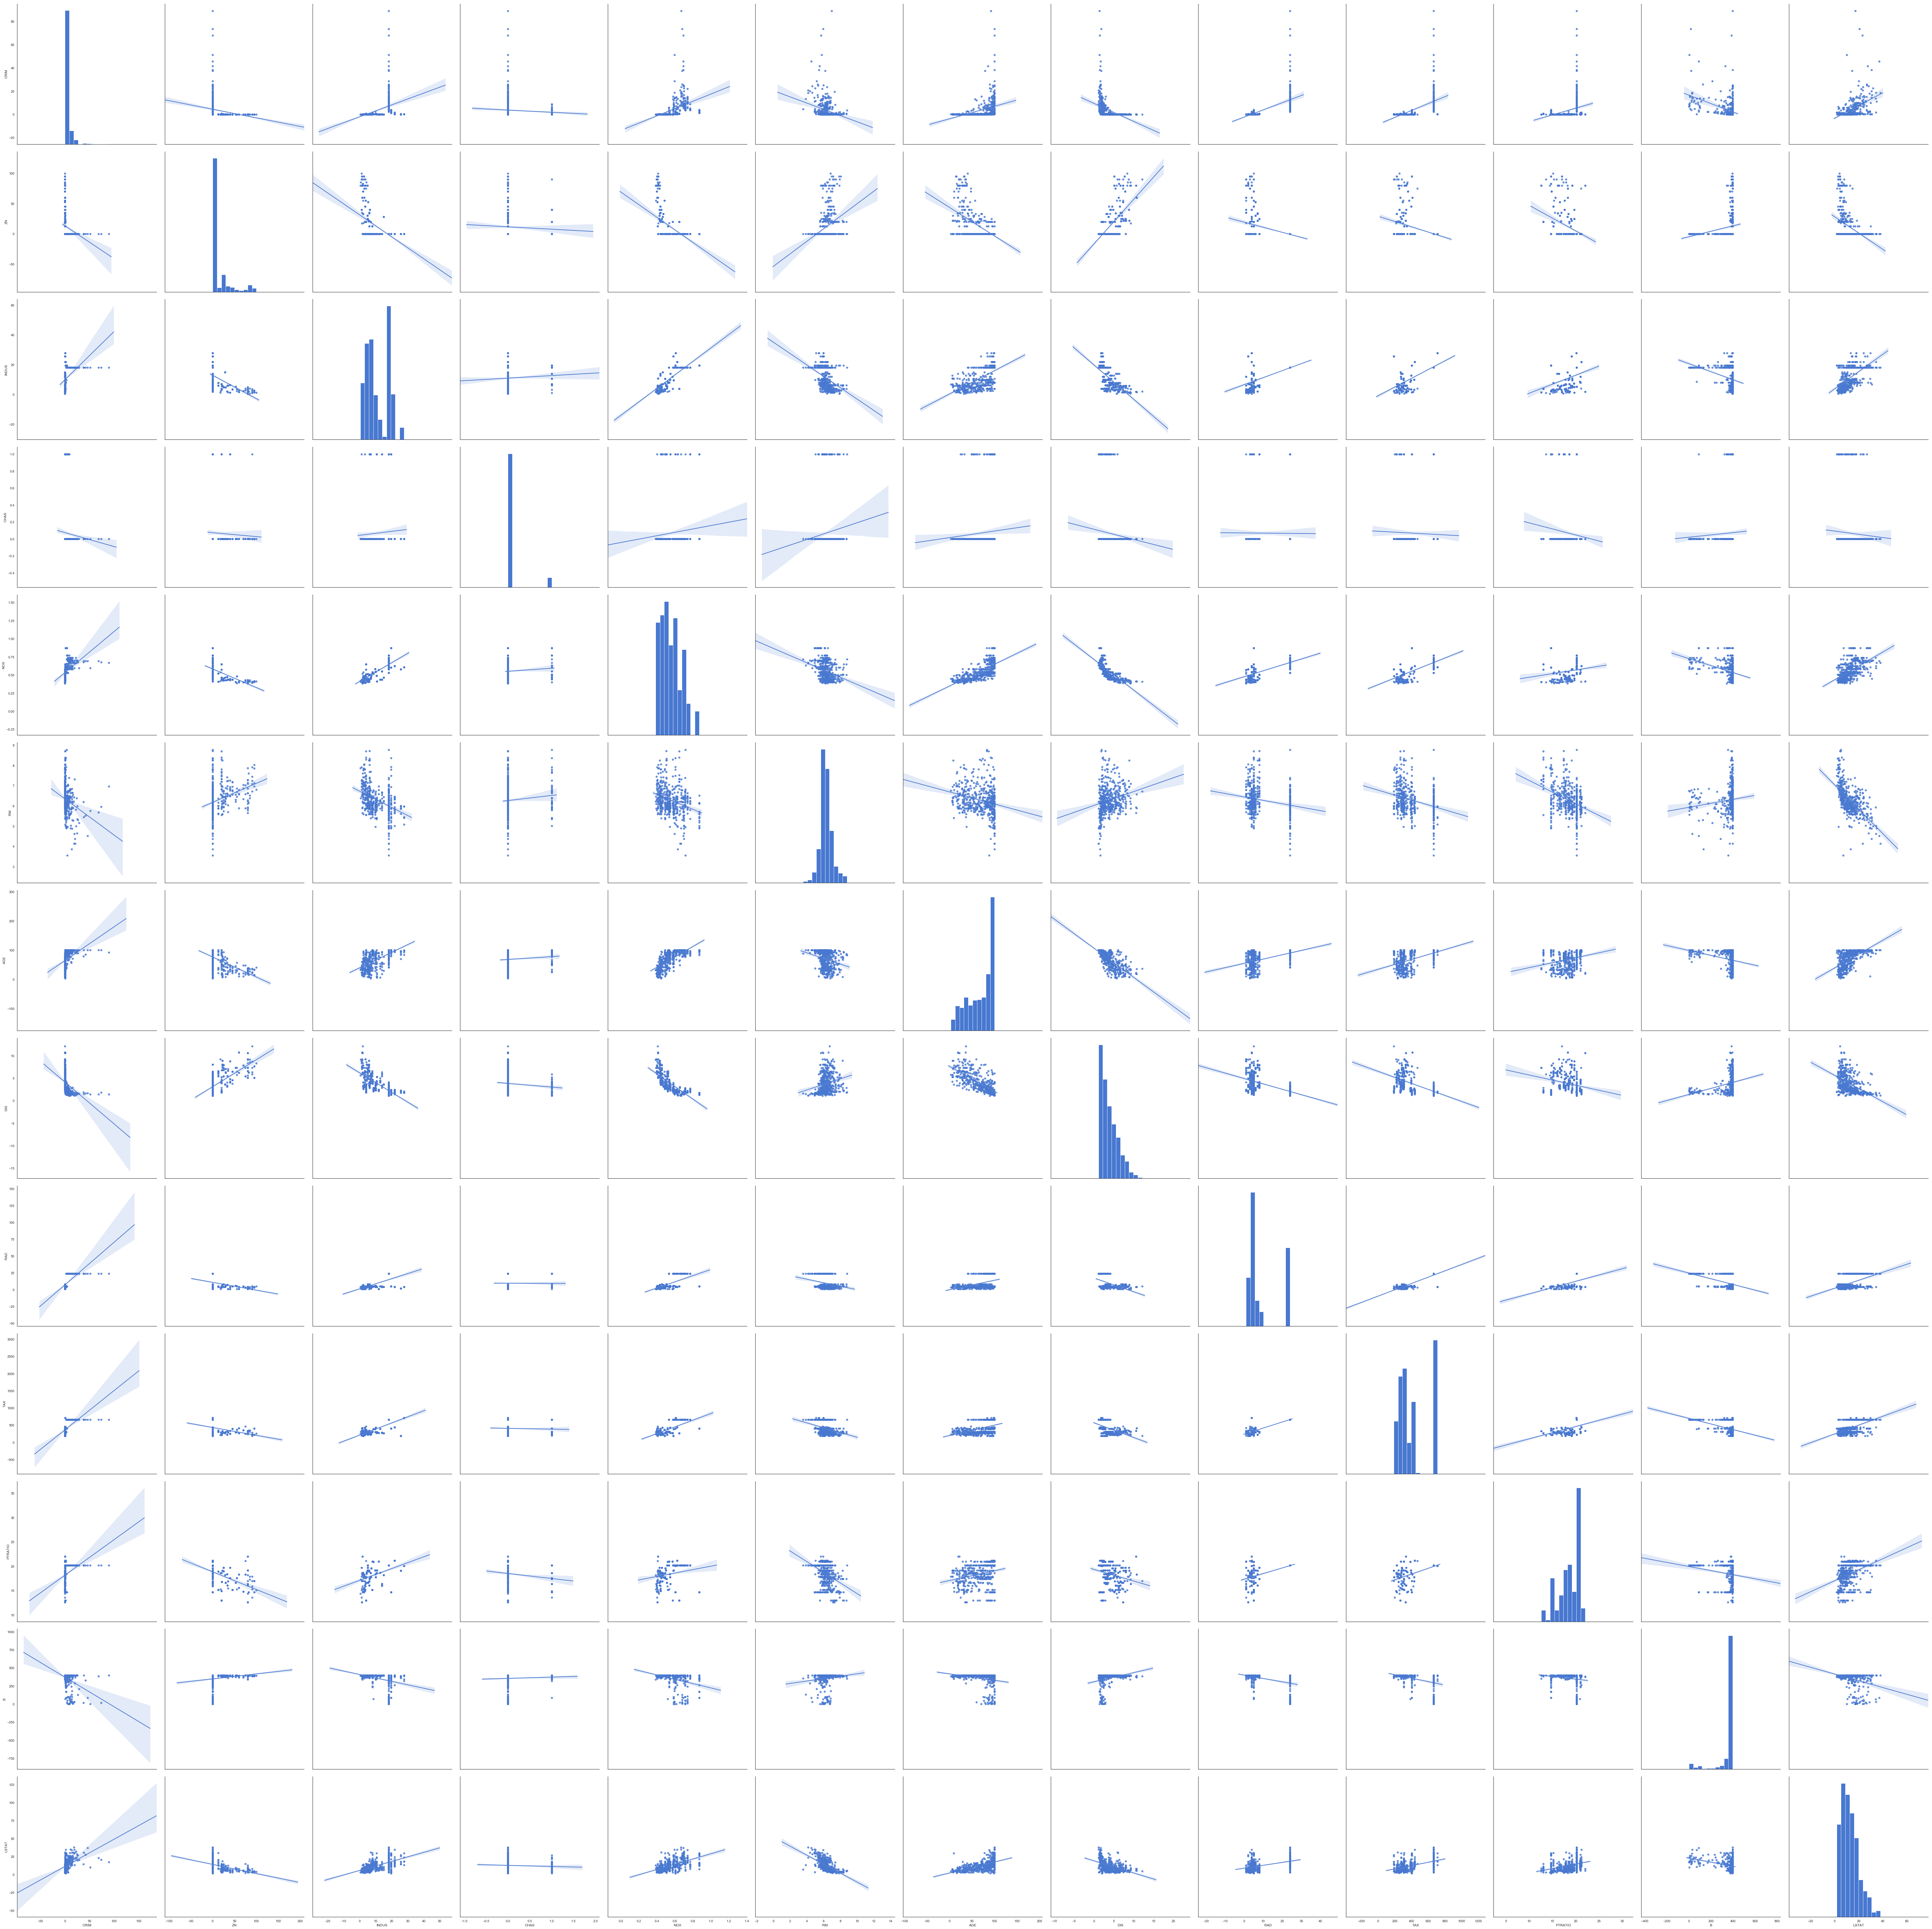

In [124]:
sns.pairplot(df, kind="reg",height=7)
plt.show()

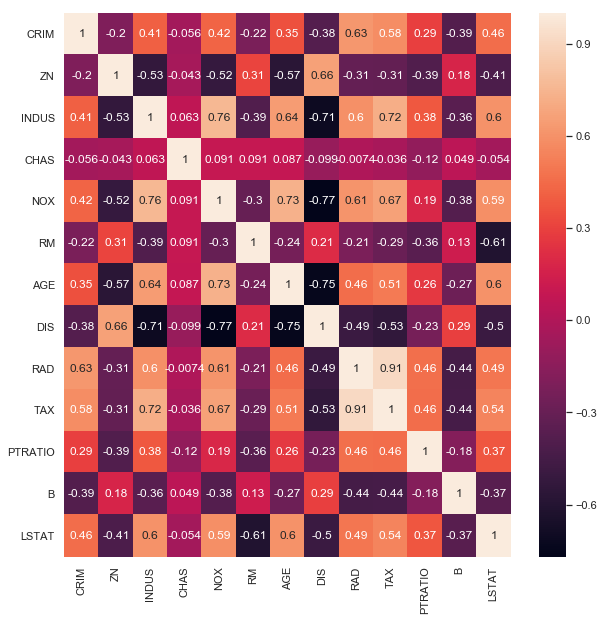

In [125]:
plt.figure(figsize= (10, 10))
sns.heatmap(df.corr(),annot= True)
plt.show()

In [126]:
df.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   

              DIS       RAD       TAX   PTRATIO         B     LSTAT  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000

In [195]:
import statsmodels.api as sm

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(boston.target, columns=["MEDV"])

import statsmodels.api as sm # import statsmodels 

X = df[["CRIM","INDUS"]] ## X uis the input variables (or independent variables)
y = target["MEDV"] ## Y is the output/dependent variable
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit() 
predictions = model.predict(X)

model.summary()

/Users/raulbenitez/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     96.83
Date:                Wed, 10 Jul 2019   Prob (F-statistic):           2.66e-36
Time:                        09:21:14   Log-Likelihood:                -1757.8
No. Observations:                 506   AIC:                             3522.
Df Residuals:                     503   BIC:                             3534.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.2483      0.670     43.624      0.000      27.931      30.566
CRIM          -0.2455      0.044     -5.536      0.000      -0.333      -0.158
INDUS         -0.5234      0.056     -9.414      0.000      -0.633      -0.414
==============================================================================
Omnibus:                      193.751   Durbin-Watson:                   0.739
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              653.883
Skew:                           1.800   Prob(JB):                    1.03e-142
Kurtosis:                       7.248   Cond. No.                         27.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Multivariate linear regression using sklearn libraries: 

In [196]:
from sklearn import linear_model
X = df[["CRIM","INDUS"]]
y = target["MEDV"]
lm = linear_model.LinearRegression()
modelsk = lm.fit(X,y)
predictions = lm.predict(X)
lm.coef_

array([-0.24547819, -0.52335108])

Compare with the parameters found by using the statsmodels libraries:

In [197]:
print('Intercetp = {}'.format(lm.intercept_))
print('PArameters = {}  {}'.format(*modelsk.coef_))

Intercetp = 29.24829270645782
PArameters = -0.2454781928314824  -0.5233510811079853


In [198]:
model.params

const    29.248293
CRIM     -0.245478
INDUS    -0.523351
dtype: float64

Represent the multivariate regression as 3d scatter plot:

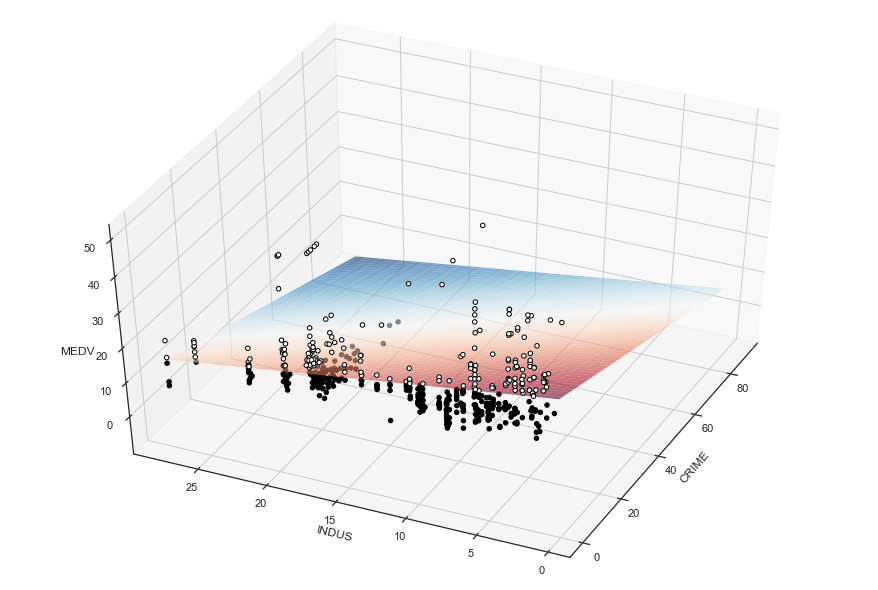

In [199]:
## Create the 3d plot 
from mpl_toolkits.mplot3d import Axes3D

xx1, xx2 = np.meshgrid(np.linspace(X["CRIM"].min(), X["CRIM"].max(), 100), 
                       np.linspace(X["INDUS"].min(), X["INDUS"].max(), 100))
# plot the hyperplane by evaluating the parameters on the grid
Z = model.params[0] + model.params[1] * xx1 + model.params[2] * xx2

# create matplotlib 3d axes
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-155, elev=45)

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# plot data points - points over the HP are white, points below are black
ax.scatter(X["CRIM"][model.resid >=0], X["INDUS"][model.resid >=0], y[model.resid >=0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X["CRIM"][model.resid <0], X["INDUS"][model.resid <0], y[model.resid <0], color='black', alpha=1.0)

# set axis labels
ax.set_xlabel('CRIME')
ax.set_ylabel('INDUS')
ax.set_zlabel('MEDV')
plt.show()